# <i>Caffeine for the Force</i> Project

### Background Info

Mrs. Jones, the PM in charge of this project, requests that you analyze this survey data, come up with actionable insights, and if there is monetization potential there, build a product that makes use of said insights, so as to optimize the corresponding revenue stream. Afterwards, you are to report to the stakeholders (Mrs. Jones' team) and provide arguments as to why this project is worth the CMO's time and resources.

According to Mr. Patel, the PM involved in the development and the deployment of the questionnaires involved, the people replying to them were a typical sub-group of the users of the company's site. However, some of them didn't reply to all of the questions, while the background information of some of the users is incomplete. Josie, the analyst who gathered all the data says that this shouldn't be an issue since the sample is large enough (and quite representative of the whole population). She went on to save this data in a .csv file and send it to you with a comment that all missing values are marked as "-".

Best of luck to you in your analysis, and may the Force be with you!

## Data Engineering

### Data Preparation, Data Representation

In [1]:
path = pwd() # get the current path for use later on

"c:\\dev\\Julia\\JuliaStudy"

In [2]:
data_location = "C:\\dev\\Julia\\JuliaStudy\\Data files-selected\\CaffeineForTheForce"

"C:\\dev\\Julia\\JuliaStudy\\Data files-selected\\CaffeineForTheForce"

In [3]:
if path != data_location
    cd(data_location)
end

In [4]:
data = readdlm("CaffeineForTheForce.csv", ',')

101×8 Array{Any,2}:
    "ID"    "MoviesWatched"  "FavoriteEpisode"  …  "FavoriteProduct"
   1        "-"              "VI"                  "VideoGame"      
   2       3                 "VI"                  "Book"           
   3      44                 "IV"                  "Book"           
   4       3                 "-"                   "Book"           
   5       7                 "VI"               …  "App"            
   6       7                 "IV"                  "VideoGame"      
   7       4                 "VI"                  "Book"           
   8       6                 "III"                 "VideoGame"      
   9       7                 "IV"                  "App"            
  10       7                 "IV"               …  "Book"           
  11       5                 "-"                   "None"           
  12       7                 "VII"                 "App"            
   ⋮                                            ⋱                   
  89       7  

In [5]:
?readdlm

search: readdlm readdir readandwrite



```
readdlm(source, T::Type; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`.

```
readdlm(source, delim::Char, T::Type; options...)
```

The end of line delimiter is taken as `\n`.

```
readdlm(source; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

```
readdlm(source, delim::Char; options...)
```

The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

```
readdlm(source, delim::Char, eol::Char; options...)
```

If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

```
readdlm(source, delim::Char, T::Type, eol::Char; header=false, skipstart=0, skipblanks=true, use_mmap, quotes=true, dims, comments=true, comment_char='#')
```

Read a matrix from the source where each line (separated by `eol`) gives one row, with elements separated by the given delimiter. The source can be a text file, stream or byte array. Memory mapped files can be used by passing the byte array representation of the mapped segment as source.

If `T` is a numeric type, the result is an array of that type, with any non-numeric elements as `NaN` for floating-point types, or zero. Other useful values of `T` include `String`, `AbstractString`, and `Any`.

If `header` is `true`, the first row of data will be read as header and the tuple `(data_cells, header_cells)` is returned instead of only `data_cells`.

Specifying `skipstart` will ignore the corresponding number of initial lines from the input.

If `skipblanks` is `true`, blank lines in the input will be ignored.

If `use_mmap` is `true`, the file specified by `source` is memory mapped for potential speedups. Default is `true` except on Windows. On Windows, you may want to specify `true` if the file is large, and is only read once and not written to.

If `quotes` is `true`, columns enclosed within double-quote (") characters are allowed to contain new lines and column delimiters. Double-quote characters within a quoted field must be escaped with another double-quote.  Specifying `dims` as a tuple of the expected rows and columns (including header, if any) may speed up reading of large files.  If `comments` is `true`, lines beginning with `comment_char` and text following `comment_char` in any line are ignored.


Hm, it looks like there are some missing values in the MoviesWatched variable. Let's see how big this issue is across the dataset.

In [6]:
N, n = size(data)

(101,8)

In [7]:
var_names = data[1,:]
data = data[2:end,:]
N -= 1 # no need to count the header as a data point

100

In [12]:
data

100×8 Array{Any,2}:
   1    "-"  "VI"      "-"  "M"  "ActiveUser"   1050  "VideoGame"
   2   3     "VI"    45     "-"  "NormalUser"   1000  "Book"     
   3  44     "IV"    33     "F"  "-"             650  "Book"     
   4   3     "-"     40     "M"  "Moderator"   11000  "Book"     
   5   7     "VI"    25     "F"  "NormalUser"    100  "App"      
   6   7     "IV"    29     "M"  "ActiveUser"    250  "VideoGame"
   7   4     "VI"    37     "M"  "Moderator"     700  "Book"     
   8   6     "III"   20     "M"  "ActiveUser"    350  "VideoGame"
   9   7     "IV"    27     "M"  "ActiveUser"    450  "App"      
  10   7     "IV"    30     "F"  "NormalUser"    350  "Book"     
  11   5     "-"     33     "M"  "NormalUser"     50  "None"     
  12   7     "VII"     "-"  "-"  "ActiveUser"    300  "App"      
  13   3     "IV"    39     "F"  "NormalUser"    300  "App"      
   ⋮                             ⋮                               
  89   7     "VII"   40     "M"  "ActiveUser"    350  "N

In [7]:
for i = 1:n
    println(var_names[i], '\t', sum(data[:,i] .== "-"))
end

ID	0
MoviesWatched	10
FavoriteEpisode	10
Age	10
Gender	10
BlogRole	10
MoneySpent	0
FavoriteProduct	0


In order to handle the various variable types more effectively, let's put them all in a data frame.

In [8]:
using DataFrames # need to load the corresponding package first. Note that we could have loaded the data using the readtable() command from this package, if we wanted.

In [10]:
df = DataFrame(data)

for i = 1:n
    cn = Symbol(string("x", i))
    nn = Symbol(var_names[i])
    rename!(df, cn, nn)
end

In [23]:
df = readtable("caffeinefortheforce.csv")

100×8 DataFrames.DataFrame
│ Row │ ID  │ MoviesWatched │ FavoriteEpisode │ Age   │ Gender │ BlogRole     │
├─────┼─────┼───────────────┼─────────────────┼───────┼────────┼──────────────┤
│ 1   │ 1   │ "-"           │ "VI"            │ "-"   │ "M"    │ "ActiveUser" │
│ 2   │ 2   │ "3"           │ "VI"            │ "45"  │ "-"    │ "NormalUser" │
│ 3   │ 3   │ "44"          │ "IV"            │ "33"  │ "F"    │ "-"          │
│ 4   │ 4   │ "3"           │ "-"             │ "40"  │ "M"    │ "Moderator"  │
│ 5   │ 5   │ "7"           │ "VI"            │ "25"  │ "F"    │ "NormalUser" │
│ 6   │ 6   │ "7"           │ "IV"            │ "29"  │ "M"    │ "ActiveUser" │
│ 7   │ 7   │ "4"           │ "VI"            │ "37"  │ "M"    │ "Moderator"  │
│ 8   │ 8   │ "6"           │ "III"           │ "20"  │ "M"    │ "ActiveUser" │
│ 9   │ 9   │ "7"           │ "IV"            │ "27"  │ "M"    │ "ActiveUser" │
│ 10  │ 10  │ "7"           │ "IV"            │ "30"  │ "F"    │ "NormalUser" │
│ 11  │ 11  │ "5"           │ "-"             │ "33"  │ "M"    │ "NormalUser" │
⋮
│ 89  │ 89  │ "7"           │ "VII"           │ "40"  │ "M"    │ "ActiveUser" │
│ 90  │ 90  │ "4"           │ "VI"            │ "145" │ "M"    │ "ActiveUser" │
│ 91  │ 91  │ "6"           │ "IV"            │ "19"  │ "F"    │ "NormalUser" │
│ 92  │ 92  │ "4"           │ "VI"            │ "29"  │ "M"    │ "NormalUser" │
│ 93  │ 93  │ "7"           │ "VI"            │ "30"  │ "M"    │ "NormalUser" │
│ 94  │ 94  │ "7"           │ "-"             │ "46"  │ "-"    │ "NormalUser" │
│ 95  │ 95  │ "5"           │ "V"             │ "50"  │ "M"    │ "NormalUser" │
│ 96  │ 96  │ "3"           │ "V"             │ "-"   │ "M"    │ "NormalUser" │
│ 97  │ 97  │ "4"           │ "IV"            │ "52"  │ "M"    │ "-"          │
│ 98  │ 98  │ "3"           │ "VI"            │ "49"  │ "M"    │ "ActiveUser" │
│ 99  │ 99  │ "6"           │ "III"           │ "12"  │ "M"    │ "ActiveUser" │
│ 100 │ 100 │ "-"           │ "IV"            │ "39"  │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 1050       │ "VideoGame"     │
│ 2   │ 1000       │ "Book"          │
│ 3   │ 650        │ "Book"          │
│ 4   │ 11000      │ "Book"          │
│ 5   │ 100        │ "App"           │
│ 6   │ 250        │ "VideoGame"     │
│ 7   │ 700        │ "Book"          │
│ 8   │ 350        │ "VideoGame"     │
│ 9   │ 450        │ "App"           │
│ 10  │ 350        │ "Book"          │
│ 11  │ 50         │ "None"          │
⋮
│ 89  │ 350        │ "None"          │
│ 90  │ 250        │ "Book"          │
│ 91  │ 250        │ "App"           │
│ 92  │ 250        │ "VideoGame"     │
│ 93  │ 200        │ "App"           │
│ 94  │ 100        │ "Book"          │
│ 95  │ 50         │ "Book"          │
│ 96  │ 150        │ "None"          │
│ 97  │ 100        │ "Book"          │
│ 98  │ 750        │ "Book"          │
│ 99  │ 150        │ "VideoGame"     │
│ 100 │ 400        │ "Book"          │

In [11]:
head(df)

6×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 1  │ "-"           │ "VI"            │ "-" │ "M"    │ "ActiveUser" │
│ 2   │ 2  │ 3             │ "VI"            │ 45  │ "-"    │ "NormalUser" │
│ 3   │ 3  │ 44            │ "IV"            │ 33  │ "F"    │ "-"          │
│ 4   │ 4  │ 3             │ "-"             │ 40  │ "M"    │ "Moderator"  │
│ 5   │ 5  │ 7             │ "VI"            │ 25  │ "F"    │ "NormalUser" │
│ 6   │ 6  │ 7             │ "IV"            │ 29  │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 1050       │ "VideoGame"     │
│ 2   │ 1000       │ "Book"          │
│ 3   │ 650        │ "Book"          │
│ 4   │ 11000      │ "Book"          │
│ 5   │ 100        │ "App"           │
│ 6   │ 250        │ "VideoGame"     │

In [13]:
tail(df)

6×8 DataFrames.DataFrame
│ Row │ ID  │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼─────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 95  │ 5             │ "V"             │ 50  │ "M"    │ "NormalUser" │
│ 2   │ 96  │ 3             │ "V"             │ "-" │ "M"    │ "NormalUser" │
│ 3   │ 97  │ 4             │ "IV"            │ 52  │ "M"    │ "-"          │
│ 4   │ 98  │ 3             │ "VI"            │ 49  │ "M"    │ "ActiveUser" │
│ 5   │ 99  │ 6             │ "III"           │ 12  │ "M"    │ "ActiveUser" │
│ 6   │ 100 │ "-"           │ "IV"            │ 39  │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 50         │ "Book"          │
│ 2   │ 150        │ "None"          │
│ 3   │ 100        │ "Book"          │
│ 4   │ 750        │ "Book"          │
│ 5   │ 150        │ "VideoGame"     │
│ 6   │ 400        │ "Book"          │

Looks like we have a few outliers as well (cases 3, 4, and possibly more). Between these two extreme users that are visible in the above preview, the former has watched 44 movies (even though she is still a toddler!) while the latter has spent more than 10x as much money than the next high-spender. The Force must be strong with these two! Alternatively, these cases could be just typos (in the first case that's almost certain since at the time of this writing there are only 7 movies out there). Either way, since Jedis are non common among the company's clientele, it would be best to deal with thess outliers by either removing them, or substituting its value for something that would make more sense. In the meantime, we can use median instead of mean for handling the missing values of the numeric features (since this metric is not influenced by outliers that much).

However, in order to do the missing value handling more efficiently, it would make sense to do some data representation at this point. So, from the above preview we can deduce that the variables of this dataset can be encoded as <b>Int64, Int64, AbstractString, Int64, AbstractString, AbstractString, Float64,</b> and <b>AbstractString</b>, at least for the time being. As Julia doesn't want to make any assumptions about the data types, everything is encoded as the most generic data type, <b>Any</b>. Also, even though we won't be using variable "ID" as a feature, it is useful to encode it as an integer, since we may need to reference it.

To make this whole type conversion process simpler, let's put all the desired data types in a single array first.

In [17]:
dt = [Int64, Int64, AbstractString, Int64, AbstractString, AbstractString, Float64, AbstractString]

8-element Array{DataType,1}:
 Int64         
 Int64         
 AbstractString
 Int64         
 AbstractString
 AbstractString
 Float64       
 AbstractString

In [19]:
typeof(df[:MoviesWatched][1])

SubString{String}

As most of our variables have missing values, it would be best to convert them afterwards. In the meantime we can work with the target variables, MoneySpent and FavorityProduct, as well as the ID variable.

In [32]:
df[:MoviesWatched] = map(df[:MoviesWatched]) do x
    if x != "-"
        parse(Int, x)
    else NA
    end
end

100-element DataArrays.DataArray{Any,1}:
   NA
  3  
 44  
  3  
  7  
  7  
  4  
  6  
  7  
  7  
  5  
  7  
  3  
  ⋮  
  7  
  4  
  6  
  4  
  7  
  7  
  5  
  3  
  4  
  3  
  6  
   NA

In [37]:
unique(df[:MoviesWatched])

8-element DataArrays.DataArray{Any,1}:
   NA
  3  
 44  
  7  
  4  
  6  
  5  
 77  

In [47]:
df_watched = df[~isna(df[:MoviesWatched]), :]

90×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age   │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼───────┼────────┼──────────────┤
│ 1   │ 2  │ 3             │ "VI"            │ "45"  │ "-"    │ "NormalUser" │
│ 2   │ 3  │ 44            │ "IV"            │ "33"  │ "F"    │ "-"          │
│ 3   │ 4  │ 3             │ "-"             │ "40"  │ "M"    │ "Moderator"  │
│ 4   │ 5  │ 7             │ "VI"            │ "25"  │ "F"    │ "NormalUser" │
│ 5   │ 6  │ 7             │ "IV"            │ "29"  │ "M"    │ "ActiveUser" │
│ 6   │ 7  │ 4             │ "VI"            │ "37"  │ "M"    │ "Moderator"  │
│ 7   │ 8  │ 6             │ "III"           │ "20"  │ "M"    │ "ActiveUser" │
│ 8   │ 9  │ 7             │ "IV"            │ "27"  │ "M"    │ "ActiveUser" │
│ 9   │ 10 │ 7             │ "IV"            │ "30"  │ "F"    │ "NormalUser" │
│ 10  │ 11 │ 5             │ "-"             │ "33"  │ "M"    │ "NormalUser" │
│ 11  │ 12 │ 7             │ "VII"           │ "-"   │ "-"    │ "ActiveUser" │
⋮
│ 79  │ 88 │ 4             │ "IV"            │ "37"  │ "M"    │ "ActiveUser" │
│ 80  │ 89 │ 7             │ "VII"           │ "40"  │ "M"    │ "ActiveUser" │
│ 81  │ 90 │ 4             │ "VI"            │ "145" │ "M"    │ "ActiveUser" │
│ 82  │ 91 │ 6             │ "IV"            │ "19"  │ "F"    │ "NormalUser" │
│ 83  │ 92 │ 4             │ "VI"            │ "29"  │ "M"    │ "NormalUser" │
│ 84  │ 93 │ 7             │ "VI"            │ "30"  │ "M"    │ "NormalUser" │
│ 85  │ 94 │ 7             │ "-"             │ "46"  │ "-"    │ "NormalUser" │
│ 86  │ 95 │ 5             │ "V"             │ "50"  │ "M"    │ "NormalUser" │
│ 87  │ 96 │ 3             │ "V"             │ "-"   │ "M"    │ "NormalUser" │
│ 88  │ 97 │ 4             │ "IV"            │ "52"  │ "M"    │ "-"          │
│ 89  │ 98 │ 3             │ "VI"            │ "49"  │ "M"    │ "ActiveUser" │
│ 90  │ 99 │ 6             │ "III"           │ "12"  │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 1000       │ "Book"          │
│ 2   │ 650        │ "Book"          │
│ 3   │ 11000      │ "Book"          │
│ 4   │ 100        │ "App"           │
│ 5   │ 250        │ "VideoGame"     │
│ 6   │ 700        │ "Book"          │
│ 7   │ 350        │ "VideoGame"     │
│ 8   │ 450        │ "App"           │
│ 9   │ 350        │ "Book"          │
│ 10  │ 50         │ "None"          │
│ 11  │ 300        │ "App"           │
⋮
│ 79  │ 250        │ "App"           │
│ 80  │ 350        │ "None"          │
│ 81  │ 250        │ "Book"          │
│ 82  │ 250        │ "App"           │
│ 83  │ 250        │ "VideoGame"     │
│ 84  │ 200        │ "App"           │
│ 85  │ 100        │ "Book"          │
│ 86  │ 50         │ "Book"          │
│ 87  │ 150        │ "None"          │
│ 88  │ 100        │ "Book"          │
│ 89  │ 750        │ "Book"          │
│ 90  │ 150        │ "VideoGame"     │

In [54]:
df_watched[df_watched[:MoviesWatched] .> 30, :]

2×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age  │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼──────┼────────┼──────────────┤
│ 1   │ 3  │ 44            │ "IV"            │ "33" │ "F"    │ "-"          │
│ 2   │ 17 │ 77            │ "IV"            │ "51" │ "M"    │ "NormalUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 650        │ "Book"          │
│ 2   │ 400        │ "App"           │

In [55]:
df_watched[df_watched[:MoviesWatched] .> 30, :Age]

2-element DataArrays.DataArray{String,1}:
 "33"
 "51"

In [ ]:
delete!()

(100,8)

In [21]:
df[:MoneySpent] = convert(Array{dt[7],1}, df[:MoneySpent])
df[:FavoriteProduct] = convert(Array{dt[8],1}, df[:FavoriteProduct])
df[:ID] = convert(Array{dt[1],1}, df[:ID])

100-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

Since our main task with this data is to classify each case into a product that they like (FavorieProduct variable), it makes sense to look at each variable on the basis of each class and use that information to fill in the missing values.

In [56]:
Q = unique(df[:FavoriteProduct])
m = length(Q)
println(Q, '\n', m)

String["VideoGame","Book","App","None"]
4


In [57]:
C = Array(Array{Int64,1}, 4) # initialize class array (an array of arrays)

4-element Array{Array{Int64,1},1}:
 #undef
 #undef
 #undef
 #undef

In [58]:
for i = 1:m
    C[i] = collect(1:N)[df[:FavoriteProduct] .== Q[i]] # indexes of class i
end

In [59]:
function FindNonMissingElements(X::Array{Any,1}, ind::Array{Int64,1})
    # finds all non-missing elements of array X that have an index belonging to ind
    Z = []
    
    for x in X[ind]
        if x != "-"
            push!(Z, x)
        end
    end
    
    return Z
end

FindNonMissingElements (generic function with 1 method)

In [70]:
[1,2,3,4][Q .== df[:FavoriteProduct][4]][1]

2

In [76]:
median(df_watched[:MoviesWatched][df_watched[:MoviesWatched] .< 30])

5.0

In [60]:
for i = 1:N
    for j = 1:5
        var_name = symbol(var_names[j+1])
        
        if df[var_name][i] == "-"
            c = [1,2,3,4][Q .== df[:FavoriteProduct][i]][1] # class of current case
            X = FindNonMissingElements(df[var_name], C[c]) # non-missing elements of feature j, for the particular class of case i
            T = dt[j+1] # type of variable j      
            
            if T <: Number
                df[var_name][i] = round(T, median(X)) # since all of our feature variables are of type Int64, it makes sense to keep them this way
            else
                df[var_name][i] = mode(X)
            end
        end
    end
end

LoadError: LoadError: TypeError: non-boolean (DataArrays.NAtype) used in boolean context
while loading In[60], in expression starting on line 1

Now all our missing values should have been taken care of. Let's confirm this by taking another look at the first part of our data frame.

In [61]:
head(df, 10)

10×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age  │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼──────┼────────┼──────────────┤
│ 1   │ 1  │ NA            │ "VI"            │ "-"  │ "M"    │ "ActiveUser" │
│ 2   │ 2  │ 3             │ "VI"            │ "45" │ "-"    │ "NormalUser" │
│ 3   │ 3  │ 44            │ "IV"            │ "33" │ "F"    │ "-"          │
│ 4   │ 4  │ 3             │ "-"             │ "40" │ "M"    │ "Moderator"  │
│ 5   │ 5  │ 7             │ "VI"            │ "25" │ "F"    │ "NormalUser" │
│ 6   │ 6  │ 7             │ "IV"            │ "29" │ "M"    │ "ActiveUser" │
│ 7   │ 7  │ 4             │ "VI"            │ "37" │ "M"    │ "Moderator"  │
│ 8   │ 8  │ 6             │ "III"           │ "20" │ "M"    │ "ActiveUser" │
│ 9   │ 9  │ 7             │ "IV"            │ "27" │ "M"    │ "ActiveUser" │
│ 10  │ 10 │ 7             │ "IV"            │ "30" │ "F"    │ "NormalUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 1050       │ "VideoGame"     │
│ 2   │ 1000       │ "Book"          │
│ 3   │ 650        │ "Book"          │
│ 4   │ 11000      │ "Book"          │
│ 5   │ 100        │ "App"           │
│ 6   │ 250        │ "VideoGame"     │
│ 7   │ 700        │ "Book"          │
│ 8   │ 350        │ "VideoGame"     │
│ 9   │ 450        │ "App"           │
│ 10  │ 350        │ "Book"          │

Looks like everything is clean. Let's now finish encoding the variables into the most appropriate types

In [62]:
for i = 2:6
    var_name = Symbol(var_names[i])
    df[var_name] = convert(Array{dt[i],1}, df[var_name])
end

LoadError: LoadError: DataArrays.NAException("Cannot convert DataArray with NA's to desired type")
while loading In[62], in expression starting on line 1

In [63]:
typeof(df[:Age]) # check one of the variables to make sure it's of the correct type

DataArrays.DataArray{String,1}

Let's now delve deeper into our data and see what else we can do to improve its quality.

### Data Exploration, Data Representation

Since this dataset is quite simple, we'll tackle it using just plots, although a stats-based approach would also work.

In [78]:
Pkg.add("Gadfly")

INFO: Cloning cache of AxisAlgorithms from https://github.com/timholy/AxisAlgorithms.jl.git
INFO: Cloning cache of Compose from https://github.com/GiovineItalia/Compose.jl.git
INFO: Cloning cache of Contour from https://github.com/tlycken/Contour.jl.git
INFO: Cloning cache of Distances from https://github.com/JuliaStats/Distances.jl.git
INFO: Cloning cache of FixedSizeArrays from https://github.com/SimonDanisch/FixedSizeArrays.jl.git
INFO: Cloning cache of ForwardDiff from https://github.com/JuliaDiff/ForwardDiff.jl.git
INFO: Cloning cache of Gadfly from https://github.com/GiovineItalia/Gadfly.jl.git
INFO: Cloning cache of Hexagons from https://github.com/dcjones/Hexagons.jl.git
INFO: Cloning cache of Interpolations from https://github.com/tlycken/Interpolations.jl.git
INFO: Cloning cache of Iterators from https://github.com/JuliaLang/Iterators.jl.git
INFO: Cloning cache of KernelDensity from https://github.com/JuliaStats/KernelDensity.jl.git
INFO: Cloning cache of Loess from https://g

In [77]:
using Gadfly # need to load a visualization package first

LoadError: LoadError: ArgumentError: Module Gadfly not found in current path.
Run `Pkg.add("Gadfly")` to install the Gadfly package.
while loading In[77], in expression starting on line 1

Let's first start with a few histograms. Firstly, let's examine the target variables since these are of the highest importance.

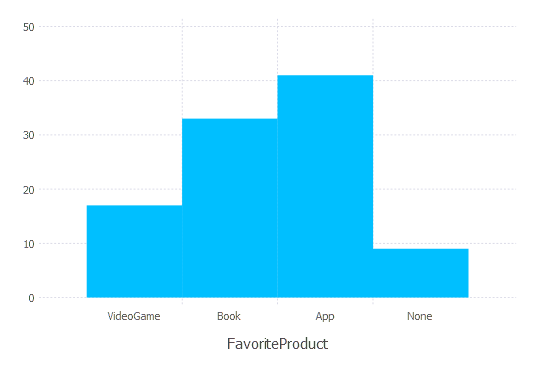

In [22]:
plot(df, x = "FavoriteProduct", Geom.histogram)

It looks like most of our users are into apps, followed closely by the book fans. Very few people seem to not care about SW products at all. How much are the spending on this stuff though? Another histogram may shed some light on this question.

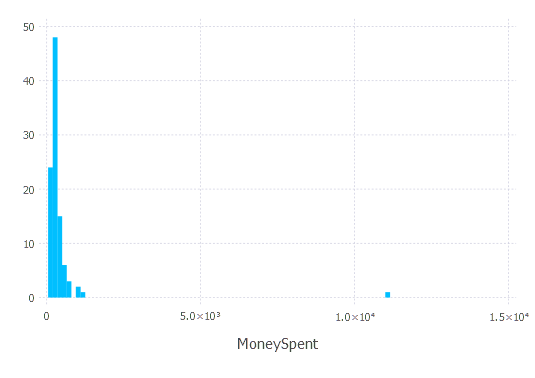

In [23]:
plot(df, x = "MoneySpent", Geom.histogram)

So, there is someone who has spent over $10000 on SW merchantise. Let's take a closer look at this person's data.

In [24]:
ind = collect(1:N)[df[:MoneySpent] .> 10000]
df[ind,:]

1×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole    │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼─────────────┤
│ 1   │ 4  │ 3             │ "VI"            │ 40  │ "M"    │ "Moderator" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 11000.0    │ "Book"          │

Well, this man seems like a very big fan (for one thing, he is a moderator in our blog) and he has been on this planet for 4 decades, but it's doubtful he spent that much money (especially considering the products sold are not that expensive). Even if he did, such a data point is bound to create some issues in our model later on (where we'll try to predict the money spent, based on the first five features), so it's best to deal with this outlier. One good strategy for this is to find the most similar user to him and copy that person's MoneySpent value. Let's start by looking at other moderators out there (there can't be that many, since it's a quite specialized role).

In [25]:
ind = df[:BlogRole] .== "Moderator"
df[ind, :]

5×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole    │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼─────────────┤
│ 1   │ 4  │ 3             │ "VI"            │ 40  │ "M"    │ "Moderator" │
│ 2   │ 7  │ 4             │ "VI"            │ 37  │ "M"    │ "Moderator" │
│ 3   │ 39 │ 7             │ "V"             │ 40  │ "M"    │ "Moderator" │
│ 4   │ 76 │ 7             │ "IV"            │ 42  │ "M"    │ "Moderator" │
│ 5   │ 85 │ 5             │ "IV"            │ 30  │ "M"    │ "Moderator" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 11000.0    │ "Book"          │
│ 2   │ 700.0      │ "Book"          │
│ 3   │ 600.0      │ "Book"          │
│ 4   │ 600.0      │ "App"           │
│ 5   │ 500.0      │ "App"           │

It looks like there is a very similar user (the one with ID = 7) who has watched about the same number of movies, is also a big fan of episode VI, is around the same age, is also a male moderator, and is fond of SW books too. It wouldn't be a stretch to copy this person's MoneySpent data to our outlier.

In [26]:
df[ind, :MoneySpent] = df[7, :MoneySpent]

700.0

Now let's take a look at the actual histogram of the MoneySpent variable.

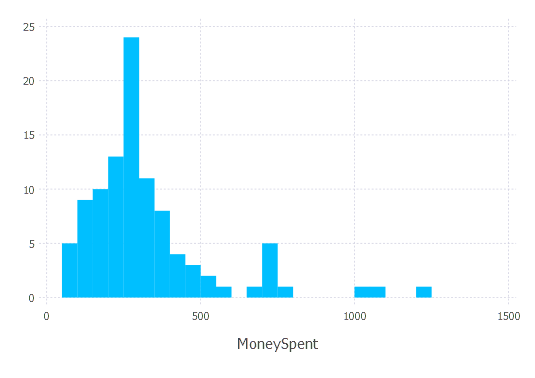

In [27]:
plot(df, x = "MoneySpent", Geom.histogram)

Let us now continue our exploration through the remaining variables (our features), omitting the ID one since it is just an identifier.

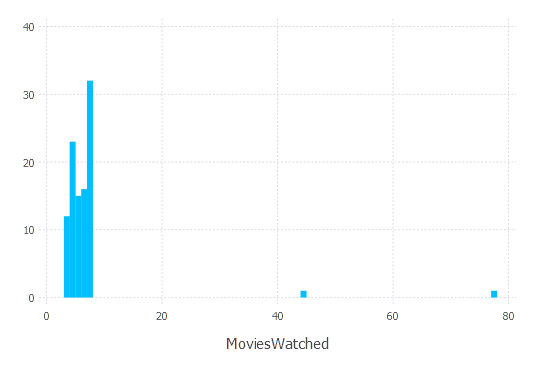

In [28]:
plot(df, x = "MoviesWatched", Geom.histogram)

Hm. It seems that the outlier we identified earlier wasn't the only case. There is another person who has watched close to 80 movies! So, unless we are dealing with a Jedi master who is using the Jedi mind trick on us, this record is unreliable and needs to be processed. Before we do anything, let's take a closer look at these outliers (basically anyone who has watched more than 7 movies):

In [27]:
ind = collect(1:N)[df[:MoviesWatched] .> 7]
df[:MoviesWatched][ind]

LoadError: LoadError: MethodError: no method matching isless(::Int64, ::String)
Closest candidates are:
  isless(!Matched::DataArrays.NAtype, ::Any) at C:\Users\ChuKY\.julia\v0.5\DataArrays\src\operators.jl:510
  isless(::Real, !Matched::AbstractFloat) at operators.jl:41
  isless(::Real, !Matched::Real) at operators.jl:75
  ...
while loading In[27], in expression starting on line 1

It appears that whoever was typing this data had limited control over the motor functions of their fingers. So, a reasonable assumption is that these outliers correspond to 4 and 7 respectively. If we were not sure about what the actual values were, we could treat them as missing values (go back to Data Preparation). Also, if we had several more outliers, we should change them first and then treat the missing values anew, to ensure that the median value we are using is not thrown off by the outliers.

In [30]:
df[:MoviesWatched][ind] = [4, 7]

2-element Array{Int64,1}:
 4
 7

Now let's see what the actual histogram of this variable looks like.

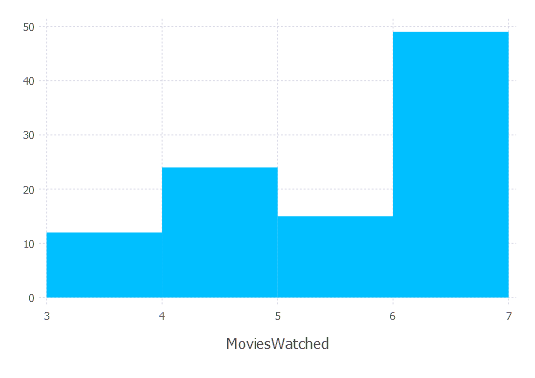

In [31]:
plot(df, x = "MoviesWatched", Geom.histogram)

No surprises here. Let's look at the FavoriteEpisode variable though.

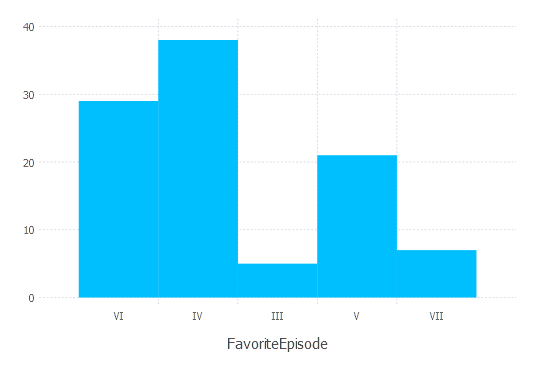

In [32]:
plot(df, x = "FavoriteEpisode", Geom.histogram)

No outliers here (though the fact that someone liked episode III more than all of the others is somewhat suspicious!). Interestingly, no-one liked episodes I and II the most, so there is still hope for the SW fans of the years to come...
What about the Age variable though?

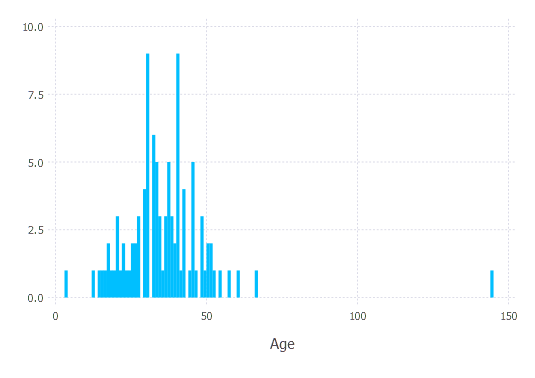

In [33]:
plot(df, x = "Age", Geom.histogram)

Hm. It looks like we have a centenial among our ranks! Moreover, that person seems to qualify for the Guiness Book of World Records. Maybe it's a Jedi Master following the steps of Yoda... Let's take a closer look at this person.

In [34]:
ind = collect(1:N)[df[:Age] .> 100]
df[ind, :]

1×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 90 │ 4             │ "VI"            │ 145 │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 250.0      │ "Book"          │

Definitely an old-timer, but it's doubtful this person is that old. It would be best to deal with this case as a missing value, since it's not feasible to accurately guess their actual age (he also belongs to a relatively common class of users). The fact that this person is into SW books (class 2) could help us provide a replacement value that won't affect our predictions of him, particularly the favorite product part. First, let's make his age a missing value.

In [35]:
df[ind,:Age] = 999 # since we can't use the "-" symbol for Int64 variables, we'll go ahead and give it an easily distinguishable value

999

Before we continue though, it's best to take a look another percular cases, a user whose age is on the other end of the spectrum (perhaps a Jedi prodigy?).

In [36]:
ind = collect(1:N)[df[:Age] .< 10]
df[ind, :]

1×8 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 87 │ 4             │ "IV"            │ 3   │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │
├─────┼────────────┼─────────────────┤
│ 1   │ 300.0      │ "Book"          │

Since there is no obvious way to replace this outlier in age, it would be best to also treat that  user's age as a missing value.

In [79]:
Pkg.add("MarketData")
Pkg.add("RDatasets")

INFO: Cloning cache of MarketData from https://github.com/JuliaQuant/MarketData.jl.git
INFO: Cloning cache of TimeSeries from https://github.com/JuliaStats/TimeSeries.jl.git
INFO: Installing MarketData v0.5.0
INFO: Installing TimeSeries v0.9.1
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of MarketData
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Cloning cache of RData from https://github.com/JuliaStats/RData.jl.git
INFO: Cloning cache of RDatasets from https://github.com/johnmyleswhite/RDatasets.jl.git
INFO: Installing RData v0.0.4
INFO: Installing RDatasets v0.2.0
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of RDatasets
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [37]:
df[ind, :Age] = 999

999

In [38]:
ind = collect(1:N)[df[:Age] .== 999] # indexes of problematic cases (for the Age variable)

2-element Array{Int64,1}:
 87
 90

In [39]:
for i in ind
    c = [1,2,3,4][Q .== df[:FavoriteProduct][i]][1] # class of current case
    nme = setdiff(C[c], ind)
    X = convert(Array,df[nme, :Age]) # non-missing elements of feature j, for the particular class of case i
    df[i, :Age] = round(Int64, median(X)) # since all of our feature variables are of type Int64, it makes sense to keep them this way
end

Now let's take a look at a more realistic histogram of the Age variable, before we continue to the Gender one.

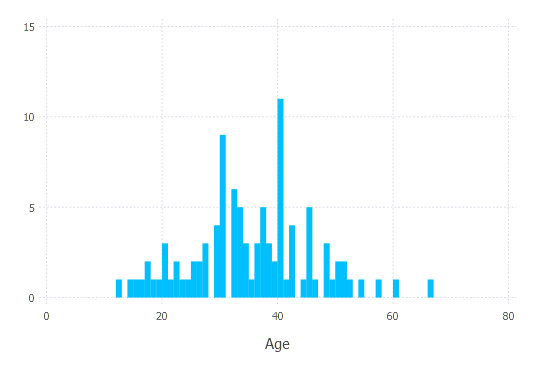

In [40]:
plot(df, x = "Age", Geom.histogram)

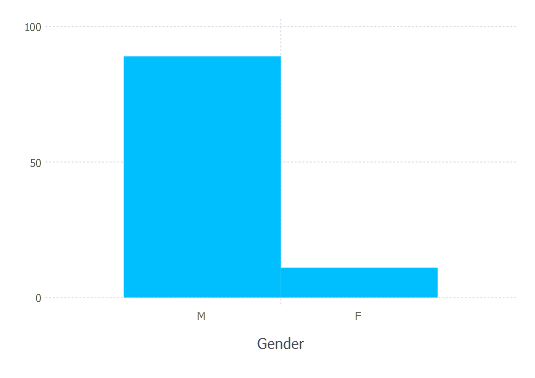

In [41]:
plot(df, x = "Gender", Geom.histogram)

Looks like the majority of our users are guys. Let's carry on to the next and final feature variable.

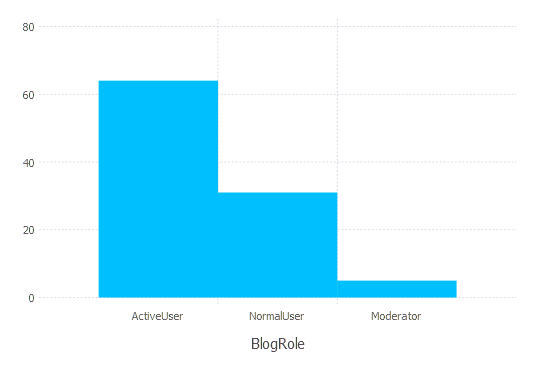

In [42]:
plot(df, x = "BlogRole", Geom.histogram)

Nothing spectacular here. I'm pretty sure that distribution holds across most blogs. Let's delve a bit deeper though and see what relationships we can find among all these variables.

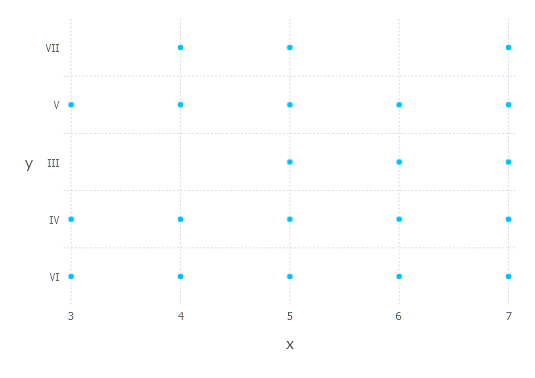

In [43]:
plot(x = df[2], y = df[3]) # relationship between MoviesWatched and FavoriteEpisode

Not much to see  here (which is good, since it shows that these two features are independent from each other).

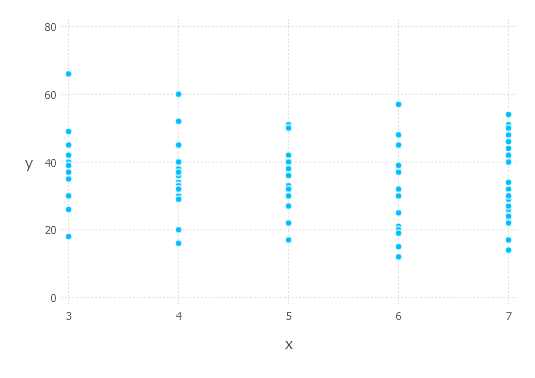

In [44]:
plot(x = df[2], y = df[4]) # relationship between MoviesWatched and Age

Nothing interesting here either. Apparently if someone is interested in the SW saga, age doesn't affect how many movies they watch.

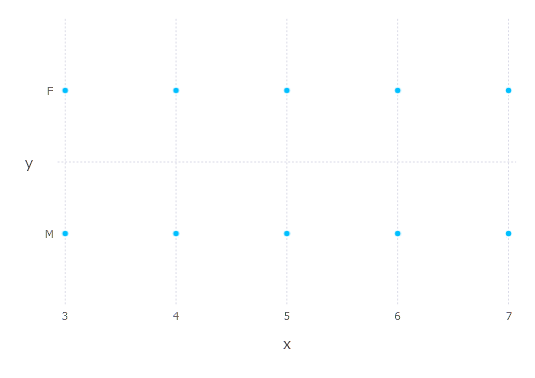

In [45]:
plot(x = df[2], y = df[5]) # relationship between MoviesWatched and Gender

Same here. Gender isn't a factor when it comes to how many SW films they are going to watch.

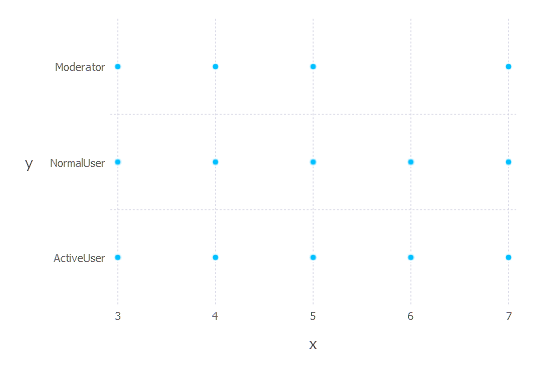

In [46]:
plot(x = df[2], y = df[6]) # relationship between MoviesWatched and BlogRole

There is a very weak signal here. It seems that if someone hasn't watched all 7 movies, they are bound to not be a moderator.

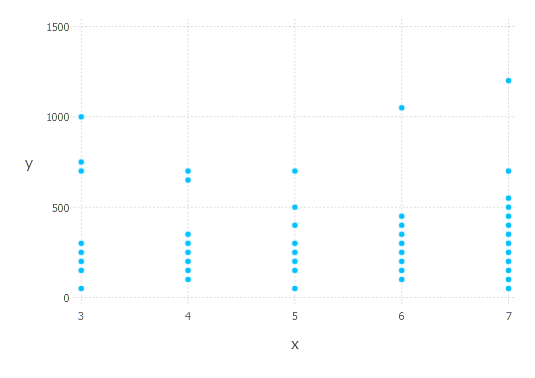

In [47]:
plot(x = df[2], y = df[7]) # relationship between MoviesWatched and MoneySpent

Not much to work with here either. Perhaps a faint signal connecting the number of movies watched with how much money they spend  on SW stuff. It could be a fluke though.

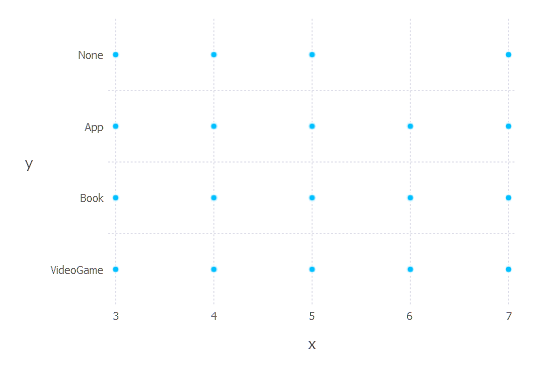

In [48]:
plot(x = df[2], y = df[8]) # relationship between MoviesWatched and FavoriteProduct

Even though this is again a quite weak signal, it may be somewhat useful. Based on this, if someone has watched 6 movies, they are unlikely to be completely disinterested in any of the SW products.

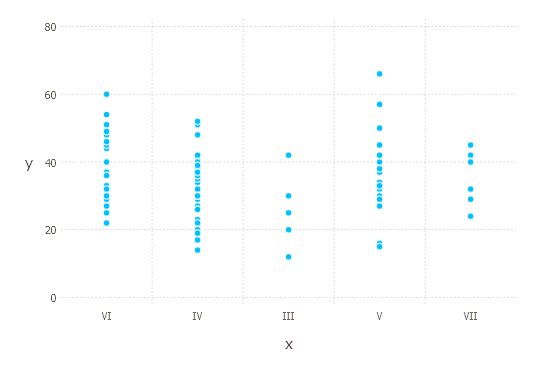

In [49]:
plot(x = df[3], y = df[4]) # relationship between FavoriteEpisode and Age

It looks like episode III appeals to a relatively younger audience (compared to episodes V and VI, for example). That's something worth exploring further (data discovery stage)

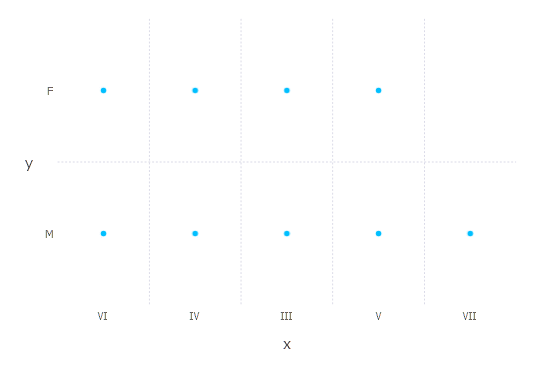

In [50]:
plot(x = df[3], y = df[5]) # relationship between FavoriteEpisode and Gender

Interestingly, none of our female users seemed to like episode VII the most.

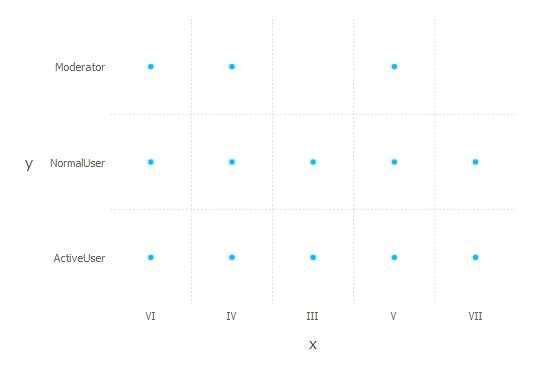

In [51]:
plot(x = df[3], y = df[6]) # relationship between FavoriteEpisode and BlogRole

Interestingly, those who like episodes III or VII the most, weren't blog moderators

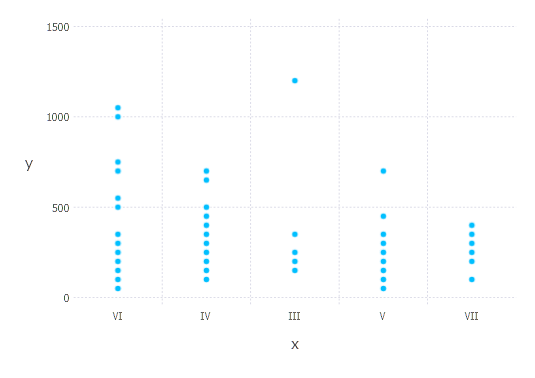

In [52]:
plot(x = df[3], y = df[7]) # relationship between FavoriteEpisode and MoneySpent

It seems that those who liked episode VI the most tend to have spent more on SW stuff, overall.

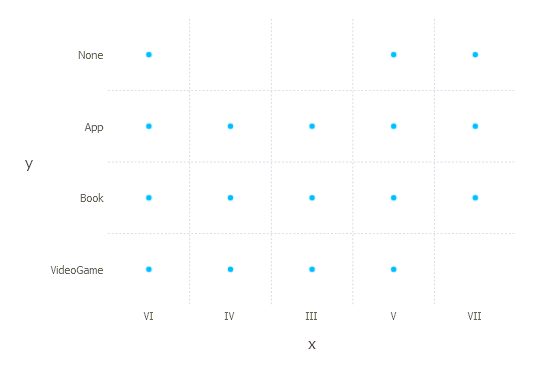

In [53]:
plot(x = df[3], y = df[8]) # relationship between FavoriteEpisode and FavoriteProduct

It appears that those who liked episodes IV or III were definitely not apathetic when it came to SW products, while those who prefered episode VII over the others, were not so much into video games.

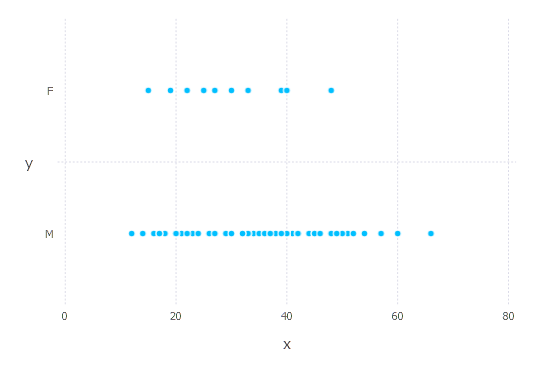

In [54]:
plot(x = df[4], y = df[5]) # relationship between Age and Gender

Interestingly most of our older users are men.

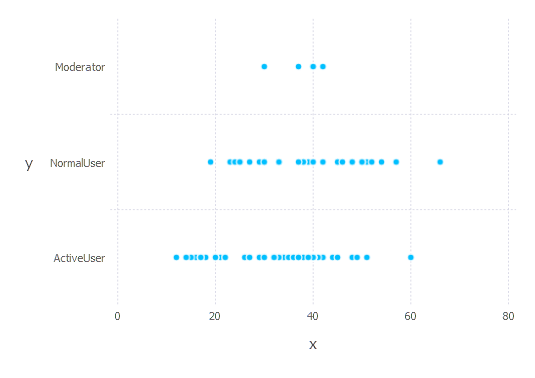

In [55]:
plot(x = df[4], y = df[6]) # relationship between Age and BlogRole

It looks like our most active users (who are not moderators) are somewhat younger than our normal users. Also, our moderators are all middle-aged.

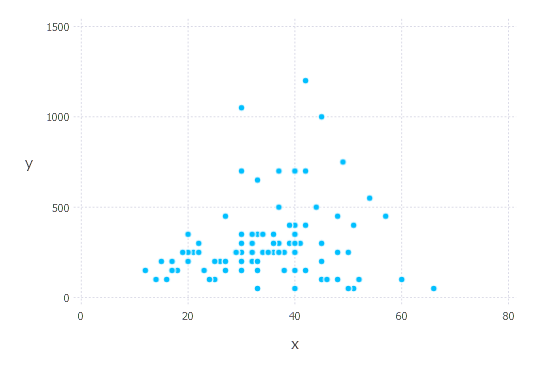

In [56]:
plot(x = df[4], y = df[7]) # relationship between Age and MoneySpent

Apparently, the high-spenders are in the middle aged group

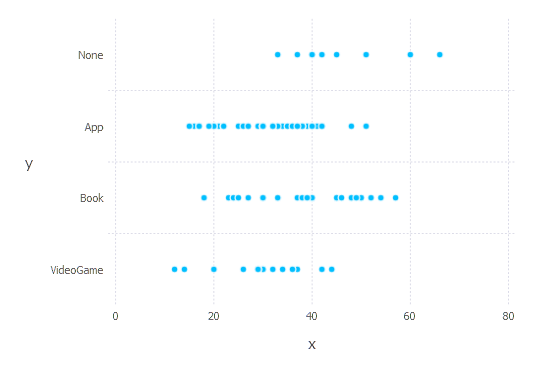

In [57]:
plot(x = df[4], y = df[8]) # relationship between Age and FavoriteProduct

Not unexpectedly, our older users are more inclined to prefer books or nothing at all, when it comes to SW products.

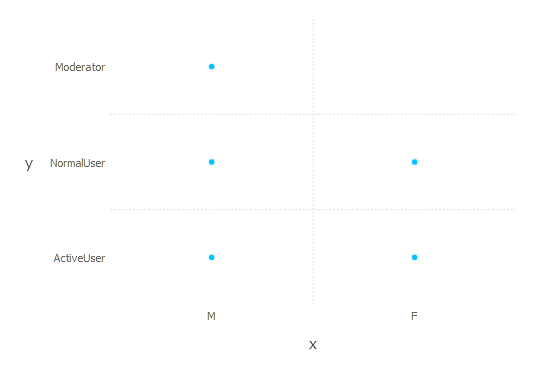

In [58]:
plot(x = df[5], y = df[6]) # relationship between Gender and BlogRole

This is definitely not the plot we are looking for (no interesting information whatsoever). Let's move along...

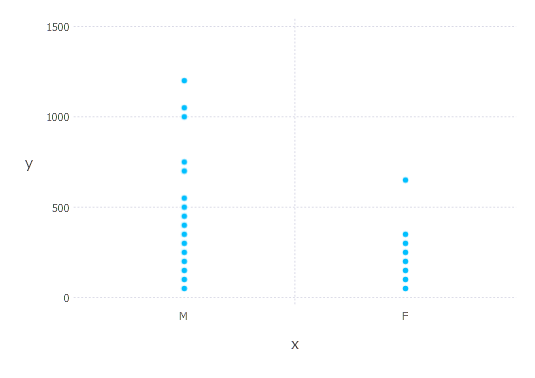

In [59]:
plot(x = df[5], y = df[7]) # relationship between Gender and MoneySpent

It looks like our male users spend more on SW stuff, overall

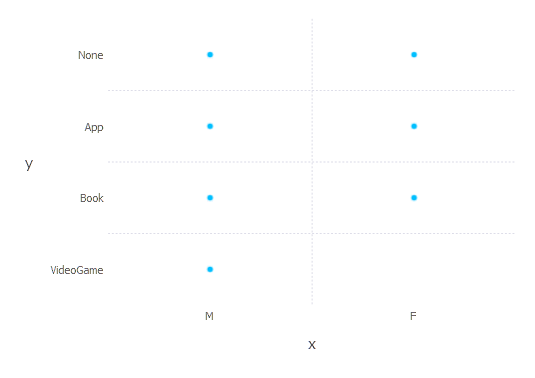

In [60]:
plot(x = df[5], y = df[8]) # relationship between Gender and FavoriteProduct

Not surprisingly, our female users are not so much into video games

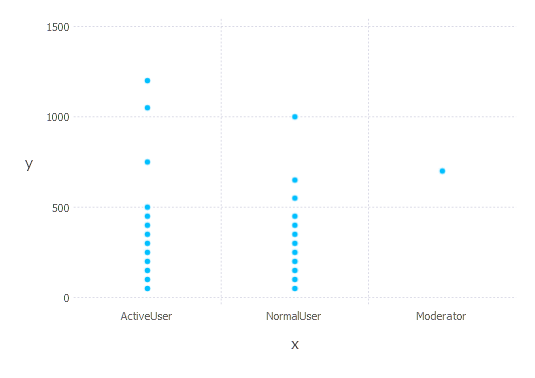

In [61]:
plot(x = df[6], y = df[7]) # relationship between BlogRole and MoneySpent

Although active users and normal users can spend anything between 0 and $1000 on SW stuff, moderators always spend about the same and that's also a lot, compared to the other users.

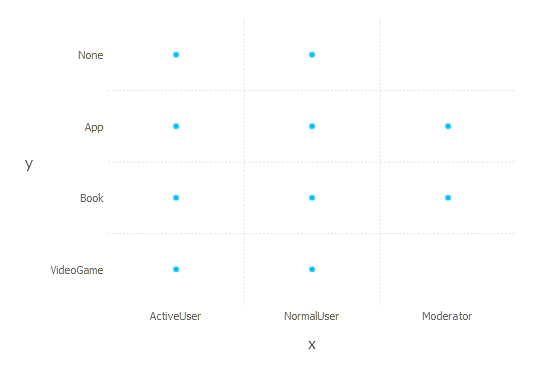

In [62]:
plot(x = df[6], y = df[8]) # relationship between BlogRole and FavoriteProduct

It is clear that moderators are interested either in apps or books, but are definitely not apathetic nor into video games.

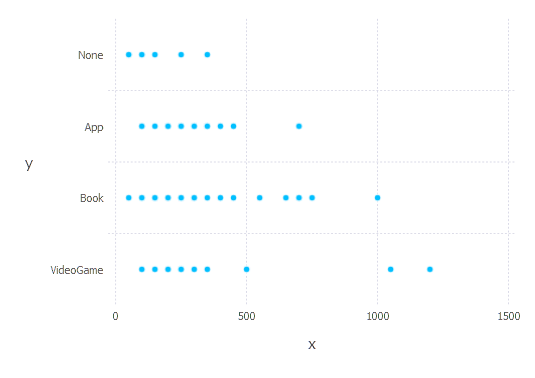

In [63]:
plot(x = df[7], y = df[8]) # relationship between MoneySpent and FavoriteProduct

Not surprisingly, those who are not into apps, or books, or video games, don't spend as much (perhaps they just go to conventions or something)

### Data Representation (revisited)

Clearly, each one of the variables we have is not all that insightful, if used as-is (a quite typical phenomenon actually). Perhaps if we were to isolate the signals in them through partitioning the nominal ones...

Just from the data exploration part, we can easily draw a few actionable insights regarding their favorite product: if a user has watched 6 movies, this is a somewhat useful predictor (Favorite product is not None). The same applies if their favorite episode is VII, in which case the possibility of video games as a favorite product is scratched. Also, if the user is a she, their favorite product has to be something other than video games. Finally, if the user is a moderator, they are definitely into one of the 3 types of products. All these insights can be captured in various custom-made binary features such as :
* IsMoviesWatched6 (takes the value true if the variable MoviesWatched is equal to 6, and false otherwise)
* IsFemale
* IsModerator
* IsFavoriteEpisode7

(we could create additional binary features to represent all the possibilities but before doing so, it would be best to do some more digging in the data discovery stage, otherwise we run the risk of the feature set size exploding)

In [64]:
df[:IsMoviesWatched6] = (df[:MoviesWatched] .== 6)
df[:IsFavoriteEpisode7] = (df[:FavoriteEpisode] .== "VII")
df[:IsFemale] = (df[:Gender] .== "F")
df[:IsModerator] = (df[:BlogRole] .== "Moderator")

100-element DataArrays.DataArray{Bool,1}:
 false
 false
 false
  true
 false
 false
  true
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [65]:
head(df)

6×12 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 1  │ 6             │ "VI"            │ 30  │ "M"    │ "ActiveUser" │
│ 2   │ 2  │ 3             │ "VI"            │ 45  │ "M"    │ "NormalUser" │
│ 3   │ 3  │ 4             │ "IV"            │ 33  │ "F"    │ "NormalUser" │
│ 4   │ 4  │ 3             │ "VI"            │ 40  │ "M"    │ "Moderator"  │
│ 5   │ 5  │ 7             │ "VI"            │ 25  │ "F"    │ "NormalUser" │
│ 6   │ 6  │ 7             │ "IV"            │ 29  │ "M"    │ "ActiveUser" │

│ Row │ MoneySpent │ FavoriteProduct │ IsMoviesWatched6 │ IsFavoriteEpisode7 │
├─────┼────────────┼─────────────────┼──────────────────┼────────────────────┤
│ 1   │ 1050.0     │ "VideoGame"     │ true             │ false              │
│ 2   │ 1000.0     │ "Book"          │ false            │ false              │
│ 3   │ 650.0      │ "Book"          │ false            │ false              │
│ 4   │ 700.0      │ "Book"          │ false            │ false              │
│ 5   │ 100.0      │ "App"           │ false            │ false              │
│ 6   │ 250.0      │ "VideoGame"     │ false            │ false              │

│ Row │ IsFemale │ IsModerator │
├─────┼──────────┼─────────────┤
│ 1   │ false    │ false       │
│ 2   │ false    │ false       │
│ 3   │ true     │ false       │
│ 4   │ false    │ true        │
│ 5   │ true     │ false       │
│ 6   │ false    │ false       │

We can create an index array for these new features, along with the Age one, for easier access to them.

In [66]:
F = ["Age", "IsMoviesWatched6", "IsFemale", "IsModerator", "IsFavoriteEpisode7"]
F = map(symbol, F)

5-element Array{Symbol,1}:
 :Age               
 :IsMoviesWatched6  
 :IsFemale          
 :IsModerator       
 :IsFavoriteEpisode7

Now it seems that we are ready for the next stage...

## Data Modelling

### Data Discovery

First, let's make use of a quite handy similarity metric (which is still not widely used), the symmetric similarity index. Just like all similarity metrics, it takes values between 0 and 1, the higher denoting more similarity. It is symetric in the sense that it captures negative similarities as well, something that the conventional similarities metrics fail to do. This allows you to see the actual similarity, just like the absolute value of the correlation coefficient for numeric features.

In [67]:
function SSI(x::BitArray{1}, y::BitArray{1})
    a = sum(!x & !y)
    b = sum(!x & y)
    c = sum(x & !y)
    d = sum(x & y)
    N = a + b + c + d
    x0 = (a + d) / N
    x1 = (b + c) / N
    return 2*max(x0, x1) - 1
end

SSI (generic function with 1 method)

Although this function works for bit arrays only (for performance reasons), it's fairly easy to use on conventional binary arrays, by applying the BitArray() function to them.

In [68]:
SSI(BitArray(df[:IsFemale]), BitArray(df[:IsModerator]))

0.6799999999999999

What about the similarity of a non-binary feature with a target? For that we can use the generalized version of SSI, which is designed to assess the predictive power of any nominal feature, for a non-binary target:

In [69]:
function SSI{T1 <: Any, T2 <: Any}(x::Array{T1, 1}, y::Array{T2, 1})
    N = length(x)
    Qx = sort(unique(x))
    Qy = sort(unique(y))
    cc = [length(Qx), length(Qy)]
    X = BitArray(N, cc[1])
    Y = BitArray(N, cc[2])
    S = Array(Float64, cc[1], cc[2])
    W = Array(Float64, cc[1], cc[2])

    for i = 1:cc[1]
        for j = 1:cc[2]
            xx = (x .== Qx[i])
            yy = (y .== Qy[j])
            W[i,j] = sum(xx & yy)
            S[i,j] = SSI(xx, yy)
        end
    end
    
    W /= N
    return sum(W.*S), S
end

SSI (generic function with 2 methods)

In [70]:
SSI(convert(Array,df[:FavoriteEpisode]), convert(Array, df[:FavoriteProduct]))

(0.26560000000000006,
5x4 Array{Float64,2}:
 0.12  0.28  0.72  0.68
 0.3   0.02  0.06  0.14
 0.12  0.08  0.6   0.36
 0.16  0.36  0.36  0.28
 0.16  0.32  0.72  0.52)

Clearly, this feature has potential, since it can predict the favorite product being video games (class 3) or if it's none (class 4) about 70% of the time, although it is a mediocre predictor for the other two classes.

In [71]:
SSI(convert(Array, df[:IsFavoriteEpisode7]), convert(Array, df[:FavoriteProduct]))

(0.32439999999999997,
2x4 Array{Float64,2}:
 0.16  0.32  0.72  0.52
 0.16  0.32  0.72  0.52)

In [72]:
SSI(convert(Array, df[:MoviesWatched]), convert(Array, df[:FavoriteProduct]))

(0.2188,
5x4 Array{Float64,2}:
 0.06  0.3   0.7   0.46
 0.14  0.14  0.42  0.34
 0.24  0.16  0.6   0.4 
 0.06  0.3   0.5   0.5 
 0.04  0.12  0.24  0.28)

Since several features tend to have some valuable aspects and others that are not that useful, it would make sense to binarize all the nominal features. Besides, this kind of representation would be useful for some classifiers.

In [73]:
function binarize{T <: Any}(X::Array{T, 1}, nv::Int64 = 0) # X is a nominal feature
    ux = sort(unique(X))
    if nv == 0; nv = length(ux); end
    Y = falses(length(X), nv) # feature values
    fn = Array(ASCIIString, nv) # feature names

    for i = 1:nv
        Y[(X .== ux[i]), i] = true
        fn[i] = string("Is_", ux[i])
    end

    return Y, fn
end

function binarize{T <: Any}(X::Array{T, 2}) # X is a set of nominal features
    N, n = size(X)
    if n == 1; return binarize(vec(X), 0); end # single feature case
    M = Array(Int64, n) # number of unique values for the various features in X
    UX = Array(Any, n) # Unique values of X

    for i = 1:n
        UX[i] = sort(unique(X[:,i]))
        M[i] = length(UX[i])
    end

    tnbf = sum(M) # Total Number of Binary Features
    Y = falses(N, tnbf) # feature values
    fn = Array(ASCIIString, tnbf) # feature names
    c = 0 # binary feature counter

    for i = 1:n # feature to be binarized
        for j = 1:M[i] # value of feature i to be processed
        c += 1 # binary feature
            Y[(X[:,i] .== UX[i][j]), c] = true
            fn[c] = string("Feat", i, "_", UX[i][j])
        end
    end

    return Y, fn
end

binarize (generic function with 3 methods)

In [74]:
non_numeric_features = convert(Array,df[[:MoviesWatched, :FavoriteEpisode, :Gender, :BlogRole]])

100x4 Array{Any,2}:
 6  "VI"   "M"  "ActiveUser"
 3  "VI"   "M"  "NormalUser"
 4  "IV"   "F"  "NormalUser"
 3  "VI"   "M"  "Moderator" 
 7  "VI"   "F"  "NormalUser"
 7  "IV"   "M"  "ActiveUser"
 4  "VI"   "M"  "Moderator" 
 6  "III"  "M"  "ActiveUser"
 7  "IV"   "M"  "ActiveUser"
 7  "IV"   "F"  "NormalUser"
 5  "V"    "M"  "NormalUser"
 7  "VII"  "M"  "ActiveUser"
 3  "IV"   "F"  "NormalUser"
 ⋮                          
 7  "VII"  "M"  "ActiveUser"
 4  "VI"   "M"  "ActiveUser"
 6  "IV"   "F"  "NormalUser"
 4  "VI"   "M"  "NormalUser"
 7  "VI"   "M"  "NormalUser"
 7  "VI"   "M"  "NormalUser"
 5  "V"    "M"  "NormalUser"
 3  "V"    "M"  "NormalUser"
 4  "IV"   "M"  "NormalUser"
 3  "VI"   "M"  "ActiveUser"
 6  "III"  "M"  "ActiveUser"
 6  "IV"   "M"  "ActiveUser"

In [75]:
bdf, feat_names = binarize(non_numeric_features);
# binarized nominal features

(
100x15 BitArray{2}:
 false  false  false   true  false  …  false   true   true  false  false
  true  false  false  false  false     false   true  false  false   true
 false   true  false  false  false      true  false  false  false   true
  true  false  false  false  false     false   true  false   true  false
 false  false  false  false   true      true  false  false  false   true
 false  false  false  false   true  …  false   true   true  false  false
 false   true  false  false  false     false   true  false   true  false
 false  false  false   true  false     false   true   true  false  false
 false  false  false  false   true     false   true   true  false  false
 false  false  false  false   true      true  false  false  false   true
 false  false   true  false  false  …  false   true  false  false   true
 false  false  false  false   true     false   true   true  false  false
  true  false  false  false  false      true  false  false  false   true
     ⋮                       

In [76]:
feat_names

15-element Array{ASCIIString,1}:
 "Feat1_3"         
 "Feat1_4"         
 "Feat1_5"         
 "Feat1_6"         
 "Feat1_7"         
 "Feat2_III"       
 "Feat2_IV"        
 "Feat2_V"         
 "Feat2_VI"        
 "Feat2_VII"       
 "Feat3_F"         
 "Feat3_M"         
 "Feat4_ActiveUser"
 "Feat4_Moderator" 
 "Feat4_NormalUser"

In [77]:
temp = convert(Array, df[:FavoriteProduct])
bfp, product_name = binarize(temp) # binarized favorite product

(
100x4 BitArray{2}:
 false  false  false   true
 false   true  false  false
 false   true  false  false
 false   true  false  false
  true  false  false  false
 false  false  false   true
 false   true  false  false
 false  false  false   true
  true  false  false  false
 false   true  false  false
 false  false   true  false
  true  false  false  false
  true  false  false  false
     ⋮                     
 false  false   true  false
 false   true  false  false
  true  false  false  false
 false  false  false   true
  true  false  false  false
 false   true  false  false
 false   true  false  false
 false  false   true  false
 false   true  false  false
 false   true  false  false
 false  false  false   true
 false   true  false  false,

ASCIIString["Is_App","Is_Book","Is_None","Is_VideoGame"])

In [78]:
N, nbf = size(bdf) # nbf = number of binary features
ndf = DataFrame() # all numeric data frame

for i = 1:nbf
    ndf[symbol(feat_names[i])] = DataArray(float(bdf[:,i]))
end

ndf[:Age] = df[:Age]
ndf[:MoneySpent] = df[:MoneySpent]

for i = 1:4
    ndf[symbol(product_name[i])] = DataArray(float(bfp[:,i]))
end

In [79]:
head(ndf)

6×21 DataFrames.DataFrame
│ Row │ Feat1_3 │ Feat1_4 │ Feat1_5 │ Feat1_6 │ Feat1_7 │ Feat2_III │ Feat2_IV │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────────┼──────────┤
│ 1   │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0       │ 0.0      │
│ 2   │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 3   │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 4   │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 5   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 6   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │

│ Row │ Feat2_V │ Feat2_VI │ Feat2_VII │ Feat3_F │ Feat3_M │ Feat4_ActiveUser │
├─────┼─────────┼──────────┼───────────┼─────────┼─────────┼──────────────────┤
│ 1   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 2   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 3   │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 4   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 5   │ 0.0     │ 1.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 6   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │

│ Row │ Feat4_Moderator │ Feat4_NormalUser │ Age │ MoneySpent │ Is_App │
├─────┼─────────────────┼──────────────────┼─────┼────────────┼────────┤
│ 1   │ 0.0             │ 0.0              │ 30  │ 1050.0     │ 0.0    │
│ 2   │ 0.0             │ 1.0              │ 45  │ 1000.0     │ 0.0    │
│ 3   │ 0.0             │ 1.0              │ 33  │ 650.0      │ 0.0    │
│ 4   │ 1.0             │ 0.0              │ 40  │ 700.0      │ 0.0    │
│ 5   │ 0.0             │ 1.0              │ 25  │ 100.0      │ 1.0    │
│ 6   │ 0.0             │ 0.0              │ 29  │ 250.0      │ 0.0    │

│ Row │ Is_Book │ Is_None │ Is_VideoGame │
├─────┼─────────┼─────────┼──────────────┤
│ 1   │ 0.0     │ 0.0     │ 1.0          │
│ 2   │ 1.0     │ 0.0     │ 0.0          │
│ 3   │ 1.0     │ 0.0     │ 0.0          │
│ 4   │ 1.0     │ 0.0     │ 0.0          │
│ 5   │ 0.0     │ 0.0     │ 0.0          │
│ 6   │ 0.0     │ 0.0     │ 1.0          │

We can run a few more tests on the dataset and see if we can come up with other insteresting variables (e.g. combos of the ones we have already), but we have a deadline to meet! So, let's save our work so far and carry on to the next stage of our analysis. To ensure that even  non-Julians can access this data, we save everything in .csv format.

In [80]:
writetable("CaffeineForTheForce_processed.csv", df)

In [81]:
writetable("CaffeineForTheForce_all_numeric.csv", ndf)

In [82]:
ndf = readtable("CaffeineForTheForce_all_numeric.csv") # we can skip this command if we are running the script from beginning to end. It is very useful however to have it in case we need to redo, or check the data modeling part, without having to go through the data engineering bit every time.

100×21 DataFrames.DataFrame
│ Row │ Feat1_3 │ Feat1_4 │ Feat1_5 │ Feat1_6 │ Feat1_7 │ Feat2_III │ Feat2_IV │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────────┼──────────┤
│ 1   │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0       │ 0.0      │
│ 2   │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 3   │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 4   │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 5   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 6   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 7   │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 8   │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 1.0       │ 0.0      │
│ 9   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 10  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 11  │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
⋮
│ 89  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 90  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 91  │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0       │ 1.0      │
│ 92  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 93  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 94  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 95  │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 96  │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 97  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 98  │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 99  │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 1.0       │ 0.0      │
│ 100 │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0       │ 1.0      │

│ Row │ Feat2_V │ Feat2_VI │ Feat2_VII │ Feat3_F │ Feat3_M │ Feat4_ActiveUser │
├─────┼─────────┼──────────┼───────────┼─────────┼─────────┼──────────────────┤
│ 1   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 2   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 3   │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 4   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 5   │ 0.0     │ 1.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 6   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 7   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 8   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 9   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 10  │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 11  │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
⋮
│ 89  │ 0.0     │ 0.0      │ 1.0       │ 0.0     │ 1.0     │ 1.0              │
│ 90  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 91  │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 92  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 93  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 94  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 95  │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 96  │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 97  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 98  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 99  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 100 │ 0.0     │ 0.0 

In [83]:
N, n = size(ndf)

(100,21)

In [84]:
n -= 5 # adjust the number of features by subtracting the number of target variables

16

### Data Learning

Let's start by loading the necessary packages (we could use additional ML tools, but these should be enough for the problem at hand).

In [85]:
using DecisionTree # a package with some commonly used classifiers
using BackpropNeuralNet # a package for a basic neural network
using ELM # a package for Extreme Learning Machines
using GLM # a package for Generalized Linear Models (regression)
using ROC # a great validation package for classification problems

INFO: Recompiling stale cache file C:\Users\Zacharias\.julia\lib\v0.4\ScikitLearnBase.ji for module ScikitLearnBase.
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in require at loading.jl:259
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at C:\Users\Zacharias\.julia\v0.4\IJulia\src\execute_request.jl:183
 in eventloop at C:\Users\Zacharias\.julia\v0.4\IJulia\src\IJulia.jl:143
 in anonymous at task.jl:447
while loading C:\Users\Zacharias\.julia\v0.4\ELM\src\base.jl, in expression starting on line 77
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in include at boot.jl:261
 in include_from_node1 at loading.jl:320
 in require at loading.jl:259
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at C:\Users\Zacharias\.juli

#### Classification

Here we'll see how we can get the computer to classify a user based on the features we have, onto the four categories of products they may be interested in.

First, let's prepare the data for the classifiers / regressors. We are going to use a 70%-30% split, which is typical for this kind of applications (although this could probably be done using a package, it's so simple that it would probably not save us any effort).

In [139]:
r = randperm(N);
tr = round(Int64, N*0.7) # number of training data points
te = N - tr # number of testing data points

30

In [107]:
train_data = df[r[1:tr],:]; # training set for our data learning experiments
test_data = df[r[(tr+1):end],:]; # testing set for our data learning experiments

30×12 DataFrames.DataFrame
│ Row │ ID │ MoviesWatched │ FavoriteEpisode │ Age │ Gender │ BlogRole     │
├─────┼────┼───────────────┼─────────────────┼─────┼────────┼──────────────┤
│ 1   │ 45 │ 5             │ "IV"            │ 22  │ "F"    │ "ActiveUser" │
│ 2   │ 93 │ 7             │ "VI"            │ 30  │ "M"    │ "NormalUser" │
│ 3   │ 11 │ 5             │ "V"             │ 33  │ "M"    │ "NormalUser" │
│ 4   │ 62 │ 7             │ "V"             │ 30  │ "M"    │ "NormalUser" │
│ 5   │ 63 │ 3             │ "IV"            │ 35  │ "M"    │ "ActiveUser" │
│ 6   │ 24 │ 6             │ "VI"            │ 45  │ "M"    │ "NormalUser" │
│ 7   │ 7  │ 4             │ "VI"            │ 37  │ "M"    │ "Moderator"  │
│ 8   │ 97 │ 4             │ "IV"            │ 52  │ "M"    │ "NormalUser" │
│ 9   │ 21 │ 5             │ "IV"            │ 40  │ "M"    │ "NormalUser" │
│ 10  │ 53 │ 4             │ "IV"            │ 32  │ "M"    │ "ActiveUser" │
│ 11  │ 54 │ 3             │ "IV"            │ 30  │ "M"    │ "ActiveUser" │
⋮
│ 19  │ 56 │ 7             │ "V"             │ 34  │ "M"    │ "ActiveUser" │
│ 20  │ 84 │ 4             │ "VI"            │ 32  │ "M"    │ "ActiveUser" │
│ 21  │ 43 │ 7             │ "IV"            │ 48  │ "M"    │ "ActiveUser" │
│ 22  │ 86 │ 5             │ "V"             │ 38  │ "M"    │ "ActiveUser" │
│ 23  │ 20 │ 4             │ "VI"            │ 60  │ "M"    │ "ActiveUser" │
│ 24  │ 74 │ 5             │ "IV"            │ 36  │ "M"    │ "ActiveUser" │
│ 25  │ 8  │ 6             │ "III"           │ 20  │ "M"    │ "ActiveUser" │
│ 26  │ 37 │ 4             │ "IV"            │ 36  │ "M"    │ "ActiveUser" │
│ 27  │ 10 │ 7             │ "IV"            │ 30  │ "F"    │ "NormalUser" │
│ 28  │ 42 │ 7             │ "IV"            │ 40  │ "M"    │ "ActiveUser" │
│ 29  │ 75 │ 4             │ "IV"            │ 32  │ "M"    │ "ActiveUser" │
│ 30  │ 4  │ 3             │ "VI"            │ 40  │ "M"    │ "Moderator"  │

│ Row │ MoneySpent │ FavoriteProduct │ IsMoviesWatched6 │ IsFavoriteEpisode7 │
├─────┼────────────┼─────────────────┼──────────────────┼────────────────────┤
│ 1   │ 300.0      │ "App"           │ false            │ false              │
│ 2   │ 200.0      │ "App"           │ false            │ false              │
│ 3   │ 50.0       │ "None"          │ false            │ false              │
│ 4   │ 150.0      │ "Book"          │ false            │ false              │
│ 5   │ 250.0      │ "App"           │ false            │ false              │
│ 6   │ 300.0      │ "Book"          │ true             │ false              │
│ 7   │ 700.0      │ "Book"          │ false            │ false              │
│ 8   │ 100.0      │ "Book"          │ false            │ false              │
│ 9   │ 150.0      │ "Book"          │ false            │ false              │
│ 10  │ 200.0      │ "App"           │ false            │ false              │
│ 11  │ 200.0      │ "VideoGame"     │ false            │ false              │
⋮
│ 19  │ 250.0      │ "VideoGame"     │ false            │ false              │
│ 20  │ 300.0      │ "App"           │ false            │ false              │
│ 21  │ 450.0      │ "App"           │ false            │ false              │
│ 22  │ 250.0      │ "App"           │ false            │ false              │
│ 23  │ 100.0      │ "None"          │ false            │ false              │
│ 24  │ 300.0      │ "App"           │ false            │ false              │
│ 25  │ 350.0      │ "VideoGame"     │ true             │ false              │
│ 26  │ 350.0      │ "App"           │ false            │ false              │
│ 27  │ 350.0      │ "Book"          │ false            │ false              │
│ 28  │ 250.0      │ "Book"          │ false            │ false              │
│ 29  │ 350.0      │ "App"           │ false            │ false              │
│ 30  │ 700.0      │ "Book"          │ false            │ false              │

│ Row │ IsFemale │ IsModerator │
├─────┼──────────┼─────────────┤
│

Now it would be a good time to see if we can get the computer to learn any patterns to be able to predict the FavoriteProduct variable for various users. Let's start with one of the simplest classifiers (which is also quite popular for problems of low dimensionality like this one).

In [108]:
ind = [2, 3, 4, 5, 6, 9, 10, 11]
features_training = convert(Array,(train_data[:, ind]));
labels_training = convert(Array,train_data[:, 8]);
features_testing = convert(Array,(test_data[:, ind]));
labels_testing = convert(Array,test_data[:, 8]);

In [109]:
model1 = build_tree(labels_training, features_training); # create the decision tree

Decision Tree
Leaves: 35
Depth:  12

In [110]:
model1 = prune_tree(model1, 0.9); # cut down a few nodes to make it less prone to overfitting

Decision Tree
Leaves: 35
Depth:  12

In [111]:
pred = apply_tree(model1, features_testing)

30-element Array{Any,1}:
 "App"      
 "Book"     
 "App"      
 "Book"     
 "App"      
 "Book"     
 "App"      
 "App"      
 "Book"     
 "App"      
 "App"      
 "Book"     
 "App"      
 ⋮          
 "VideoGame"
 "App"      
 "VideoGame"
 "VideoGame"
 "None"     
 "VideoGame"
 "App"      
 "VideoGame"
 "Book"     
 "App"      
 "App"      
 "Book"     

In [112]:
AR = sum(labels_testing .== pred) / length(labels_testing)

0.4666666666666667

This doesn't look very promising. Let's try another model along these lines...

In [113]:
model2 = build_forest(labels_training, features_training, 3, 20); # params = number of features in each tree, number of trees

Ensemble of Decision Trees
Trees:      20
Avg Leaves: 18.3
Avg Depth:  7.55

In [114]:
pred = apply_forest(model2, features_testing)

30-element Array{Any,1}:
 "App"      
 "Book"     
 "Book"     
 "Book"     
 "VideoGame"
 "Book"     
 "VideoGame"
 "Book"     
 "Book"     
 "App"      
 "VideoGame"
 "Book"     
 "App"      
 ⋮          
 "VideoGame"
 "VideoGame"
 "VideoGame"
 "App"      
 "None"     
 "VideoGame"
 "App"      
 "VideoGame"
 "Book"     
 "VideoGame"
 "App"      
 "Book"     

In [115]:
AR = sum(labels_testing .== pred) / length(labels_testing)

0.5

That's better. Apparently a single tree can't create a good enough generalization but a series of them can do the trick. Let's see how a different kind of tree ensemble performs.

In [116]:
model3, coeffs = build_adaboost_stumps(labels_training, features_training, 10);

In [117]:
pred = apply_adaboost_stumps(model3, coeffs, features_testing)

30-element Array{Any,1}:
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 ⋮    
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"
 "App"

In [118]:
AR = sum(labels_testing .== pred) / length(labels_testing)

0.43333333333333335

Apparently, this doesn't help our case much. Maybe we'll have better luck with a different type of classifier, such as a neural network.

Before doing so though, we'll need to get the all-numeric version of the dataset, since neural nets are incompatible with anything else.

In [119]:
train_data = ndf[r[1:tr],:]; # training set for our data learning experiments using all-numeric features
test_data = ndf[r[(tr+1):end],:]; # testing set for our data learning experiments using all-numeric features

30×21 DataFrames.DataFrame
│ Row │ Feat1_3 │ Feat1_4 │ Feat1_5 │ Feat1_6 │ Feat1_7 │ Feat2_III │ Feat2_IV │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────────┼──────────┤
│ 1   │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 2   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 3   │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 4   │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 5   │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 6   │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0       │ 0.0      │
│ 7   │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 8   │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 9   │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 10  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 11  │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
⋮
│ 19  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 0.0      │
│ 20  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 21  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 22  │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 23  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │
│ 24  │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 25  │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0     │ 1.0       │ 0.0      │
│ 26  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 27  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 28  │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 1.0     │ 0.0       │ 1.0      │
│ 29  │ 0.0     │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 1.0      │
│ 30  │ 1.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0     │ 0.0       │ 0.0      │

│ Row │ Feat2_V │ Feat2_VI │ Feat2_VII │ Feat3_F │ Feat3_M │ Feat4_ActiveUser │
├─────┼─────────┼──────────┼───────────┼─────────┼─────────┼──────────────────┤
│ 1   │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 1.0              │
│ 2   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 3   │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 4   │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 5   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 6   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 7   │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 8   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 9   │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 0.0              │
│ 10  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 11  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
⋮
│ 19  │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 20  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 21  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 22  │ 1.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 23  │ 0.0     │ 1.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 24  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 25  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 26  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 27  │ 0.0     │ 0.0      │ 0.0       │ 1.0     │ 0.0     │ 0.0              │
│ 28  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 29  │ 0.0     │ 0.0      │ 0.0       │ 0.0     │ 1.0     │ 1.0              │
│ 30  │ 0.0     │ 1.0  

In [120]:
n = size(train_data, 2) - 5 # you can skip this command if you have already computed the number of variables n

16

In [121]:
features_training_new = map(Float64,Array(train_data[:,1:n]))
features_testing_new = map(Float64,Array(test_data[:,1:n]))

30x16 Array{Float64,2}:
 0.0  0.0  1.0  0.0  0.0  0.0  1.0  …  0.0  1.0  0.0  1.0  0.0  0.0  22.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  30.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  33.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  30.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  1.0  0.0  0.0  35.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  1.0  45.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  1.0  0.0  37.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  0.0  0.0  1.0  52.0
 0.0  0.0  1.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  0.0  0.0  1.0  40.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  1.0  0.0  0.0  32.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0  1.0  1.0  0.0  0.0  30.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1.0  0.0  0.0  40.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1.0  0.0  0.0  27.0
 ⋮            

It would be a good idea to normalize the last feature (Age), since, unlike Jedis, neural networks can get confused very easily with scale.

In [122]:
max_ = maximum(features_training_new[:,end])
min_ = minimum(features_training_new[:,end])

12.0

In [123]:
features_training_new[:,end] = (features_training_new[:,end] - min_) / (max_ - min_);
features_testing_new[:,end] = (features_testing_new[:,end] - min_) / (max_ - min_);

In [124]:
labels_training_new = map(Float64,Array(train_data[:,(end-3):end]))
labels_testing_new = map(Float64,Array(test_data[:,(end-3):end]))

30x4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 ⋮                 
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0

In [125]:
println(labels_training_new[1:10,:])
println(labels_testing_new[1:10,:])

[1.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0
 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 1.0
 1.0 0.0 0.0 0.0
 0.0 1.0 0.0 0.0
 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0]
[1.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0
 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0.0
 1.0 0.0 0.0 0.0
 0.0 1.0 0.0 0.0
 0.0 1.0 0.0 0.0
 0.0 1.0 0.0 0.0
 0.0 1.0 0.0 0.0
 1.0 0.0 0.0 0.0]


In [126]:
net = init_network([n, round(Int64, 1.5*n), m]); # create an artificial neural net

BackpropNeuralNet.NeuralNetwork([16,24,4],false,0.25,0.1,(anonymous function),(anonymous function),(anonymous function),Array{Float64,N}[[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0,1.0,1.0]],Array{Float64,N}[
17x24 Array{Float64,2}:
 -0.716  -0.931   0.395  -0.879  -0.515  …  -0.663   0.587  -0.692  -0.463
 -0.321  -0.758  -0.425  -0.286   1.0       -0.37   -0.2     0.31    0.171
  0.673  -0.694  -0.942  -0.586   0.779     -0.864  -0.628   0.192   0.494
 -0.356   0.177   0.922   0.599   0.101      0.822  -0.385   0.526  -0.804
  0.041  -0.132   0.792  -0.448   0.232      0.176  -0.938  -0.261  -0.341
 -0.186   0.0    -0.426  -0.72   -0.999  …   0.72    0.029   0.899   0.437
  0.685   0.079   0.268   0.15    0.985     -0.328  -0.165  -0.965  -0.003
 -0.479   0.869   0.943  -0.431  -0.375      0.97   -0.408  -0.489  -0.686
  0.343  -0.153  -0.537   0.046  -0.287     -0

In [127]:
for j = 1:2500 # train for 2500 epochs
    if mod(j,500) == 0; println(j); end # this is just to show how the training progresses
    
    for i = 1:size(features_training_new, 1)
        a = features_training_new[i,:]
        b = labels_training_new[i,:]
        train(net, a[:], b[:])
    end
end

500
1000
1500
2000
2500


In [128]:
nn = size(features_testing_new, 1)
pred_labels = Array(Float64, nn, m)

for i = 1:nn
    pred_labels[i,:] = net_eval(net, features_testing_new[i,:][:])
end

In [129]:
function ANN2vector{T <: Any}(Z::Array{Float64, 2}, Q::Array{T,1})
    # turn a matrix one from an ANN into a vector output
    N, noc = size(Z)
    z = Array(T, N)
    p = Array(Float64, N)
    
    for i = 1:N
        p[i], ind = findmax(Z[i,:])
        z[i] = Q[ind]
    end
    
    return z, p
end

ANN2vector (generic function with 1 method)

In [130]:
QQ = sort(Array(Q))

4-element Array{AbstractString,1}:
 "App"      
 "Book"     
 "None"     
 "VideoGame"

In [131]:
pred, prob = ANN2vector(pred_labels, QQ)

(AbstractString["App","Book","Book","Book","App","Book","Book","Book","Book","VideoGame"  …  "App","App","Book","VideoGame","VideoGame","App","App","App","VideoGame","Book"],[0.951835,0.997838,0.459711,0.610938,0.999401,1.0,0.67811,0.998277,0.998538,0.908261  …  0.977297,0.999658,0.998663,0.969611,0.999105,0.350335,0.859202,0.907114,0.908261,0.999962])

In [132]:
AR = sum(labels_testing .== pred) / length(labels_testing)

0.43333333333333335

Hmm. Perhaps there is a limit to how good performance we can get with this dataset. Let's see if ELMs can give us a better prediction.

In [140]:
targets_training = ones(tr)
targets_testing = ones(te)

30-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [142]:
ind_book = (labels_training .== "Book")
ind_none = (labels_training .== "None")
ind_game = (labels_training .== "VideoGame")

70-element BitArray{1}:
 false
  true
 false
  true
 false
 false
 false
 false
 false
  true
 false
  true
 false
     ⋮
 false
 false
 false
  true
  true
 false
  true
 false
 false
 false
 false
 false

In [143]:
targets_training[ind_book] = 2.0
targets_training[ind_none] = 3.0
targets_training[ind_game] = 4.0

4.0

In [144]:
ind_book = (labels_testing .== "Book")
ind_none = (labels_testing .== "None")
ind_game = (labels_testing .== "VideoGame")

30-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
     ⋮
  true
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
 false

In [145]:
targets_testing[ind_book] = 2.0
targets_testing[ind_none] = 3.0
targets_testing[ind_game] = 4.0

4.0

In [146]:
elm = ExtremeLearningMachine(35);

In [147]:
ELM.fit!(elm, features_training_new, targets_training)

1x35 Array{Float64,2}:
 -3.11041  -26.2388  4.72645  -10.6715  …  -11.7578  -8.0015  -20.4951

In [148]:
outputs = ELM.predict(elm, features_testing_new)

30-element Array{Float64,1}:
  0.127967 
  2.72315  
  1.64368  
  2.51131  
  1.70565  
  1.88713  
 -0.758001 
  0.0332703
  3.56331  
  2.00462  
  1.44687  
  3.99414  
  0.674724 
  ⋮        
  2.42811  
  3.70569  
  2.58183  
  1.36484  
  4.42129  
  3.1962   
  3.94834  
  2.28888  
  1.54135  
  2.50779  
  2.00462  
 -5.98197  

Clearly, we'll need to adjust the outputs so that they can be mapped to the 4 classes we have.

In [149]:
outputs[outputs .< 1.0] = 1.0

1.0

In [150]:
outputs[outputs .> 4.0] = 4.0

4.0

In [151]:
pred = QQ[round(Int64, outputs)]

30-element Array{AbstractString,1}:
 "App"      
 "None"     
 "Book"     
 "None"     
 "Book"     
 "Book"     
 "App"      
 "App"      
 "VideoGame"
 "Book"     
 "App"      
 "VideoGame"
 "App"      
 ⋮          
 "Book"     
 "VideoGame"
 "None"     
 "App"      
 "VideoGame"
 "None"     
 "VideoGame"
 "Book"     
 "Book"     
 "None"     
 "Book"     
 "App"      

In [152]:
AR = sum(labels_testing .== pred) / length(labels_testing)

0.23333333333333334

Time to evaluate the results in more depth. In this part we'll be using the ROC curve, which is a very robust validation strategy. Since only some of the classifiers performed adequately,  we'll focus on just these ones (random forest and neural network).

In [153]:
prob = apply_forest_proba(model2, features_testing, QQ)
p = maximum(prob, 2)

30x1 Array{Float64,2}:
 0.75
 0.75
 0.4 
 0.75
 0.3 
 1.0 
 0.5 
 0.5 
 0.5 
 0.55
 0.3 
 0.45
 0.7 
 ⋮   
 0.6 
 0.55
 0.35
 0.55
 0.45
 0.65
 0.5 
 0.5 
 0.75
 0.35
 0.55
 0.5 

In [154]:
p = p[:]; # make probabilities Array 1-dimensional

30-element Array{Float64,1}:
 0.75
 0.75
 0.4 
 0.75
 0.3 
 1.0 
 0.5 
 0.5 
 0.5 
 0.55
 0.3 
 0.45
 0.7 
 ⋮   
 0.6 
 0.55
 0.35
 0.55
 0.45
 0.65
 0.5 
 0.5 
 0.75
 0.35
 0.55
 0.5 

In [155]:
z = (apply_forest(model2, features_testing) .== labels_testing)

30-element BitArray{1}:
  true
 false
 false
  true
 false
  true
 false
  true
  true
  true
  true
  true
  true
     ⋮
  true
 false
 false
  true
  true
 false
 false
 false
  true
 false
  true
  true

In [156]:
rc1 = ROC.roc(p, z)

ROC.ROCData{Float64}([1.0,0.75,0.75,0.75,0.75,0.7,0.65,0.6,0.55,0.55  …  0.5,0.5,0.45,0.45,0.45,0.4,0.35,0.35,0.3,0.3],Bool[true,true,false,true,true,true,false,true,true,false  …  false,true,true,false,true,false,false,false,false,true],15,30,15,1:29,[1,2,2,3,4,5,5,6,7,7  …  11,11,12,13,13,14,14,14,14,14],[15,15,14,14,14,14,13,13,13,12  …  6,5,5,5,4,4,3,2,1,0],[0,0,1,1,1,1,2,2,2,3  …  9,10,10,10,11,11,12,13,14,15],[14,13,13,12,11,10,10,9,8,8  …  4,4,3,2,2,1,1,1,1,1],[0.0,0.0,0.0666667,0.0666667,0.0666667,0.0666667,0.133333,0.133333,0.133333,0.2  …  0.6,0.666667,0.666667,0.666667,0.733333,0.733333,0.8,0.866667,0.933333,1.0],[0.0666667,0.133333,0.133333,0.2,0.266667,0.333333,0.333333,0.4,0.466667,0.466667  …  0.733333,0.733333,0.8,0.866667,0.866667,0.933333,0.933333,0.933333,0.933333,0.933333])

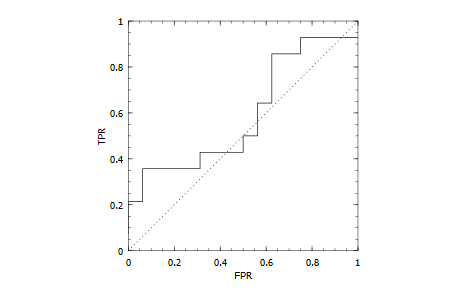

In [237]:
ROC.plot(rc1)

In [157]:
AUC(rc1)

0.6844444444444443

In [158]:
pred, prob = ANN2vector(pred_labels, QQ)

(AbstractString["App","Book","Book","Book","App","Book","Book","Book","Book","VideoGame"  …  "App","App","Book","VideoGame","VideoGame","App","App","App","VideoGame","Book"],[0.951835,0.997838,0.459711,0.610938,0.999401,1.0,0.67811,0.998277,0.998538,0.908261  …  0.977297,0.999658,0.998663,0.969611,0.999105,0.350335,0.859202,0.907114,0.908261,0.999962])

In [159]:
z = (pred .== labels_testing);

In [160]:
rc2 = ROC.roc(prob, z)

ROC.ROCData{Float64}([1.0,0.999962,0.999664,0.999658,0.999401,0.999327,0.999323,0.999283,0.99924,0.999201  …  0.908261,0.908261,0.907114,0.859202,0.749265,0.67811,0.610938,0.459711,0.350335,0.217985],Bool[true,true,true,true,true,false,false,false,false,false  …  false,false,false,false,false,true,true,false,true,false],13,30,17,1:29,[1,2,3,4,5,5,5,5,5,5  …  10,10,10,10,10,10,11,12,12,13],[17,17,17,17,17,16,15,14,13,12  …  7,6,5,4,3,2,2,2,1,1],[0,0,0,0,0,1,2,3,4,5  …  10,11,12,13,14,15,15,15,16,16],[12,11,10,9,8,8,8,8,8,8  …  3,3,3,3,3,3,2,1,1,0],[0.0,0.0,0.0,0.0,0.0,0.0588235,0.117647,0.176471,0.235294,0.294118  …  0.588235,0.647059,0.705882,0.764706,0.823529,0.882353,0.882353,0.882353,0.941176,0.941176],[0.0769231,0.153846,0.230769,0.307692,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615  …  0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.846154,0.923077,0.923077,1.0])

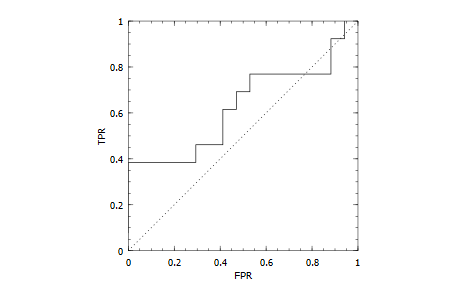

In [161]:
ROC.plot(rc2)

In [162]:
AUC(rc2)

0.5701357466063349

Based on all of the above analysis, we can conclude that the random forest classifier works best for this particular problem.

#### Regression

Let's now do the same for the prediction of the MoneySpent variable.

In [163]:
join(names(train_data), " + ")

"Feat1_3 + Feat1_4 + Feat1_5 + Feat1_6 + Feat1_7 + Feat2_III + Feat2_IV + Feat2_V + Feat2_VI + Feat2_VII + Feat3_F + Feat3_M + Feat4_ActiveUser + Feat4_Moderator + Feat4_NormalUser + Age + MoneySpent + Is_App + Is_Book + Is_None + Is_VideoGame"

In [164]:
reg_model1 = GLM.fit(LinearModel, MoneySpent ~ Feat1_3 + Feat1_4 + Feat1_5 + Feat1_6 + Feat1_7 + Feat2_III + Feat2_IV + Feat2_V + Feat2_VI + Feat2_VII + Feat3_F + Feat3_M + Feat4_ActiveUser + Feat4_Moderator + Feat4_NormalUser + Age, train_data)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Float64}

Formula: MoneySpent ~ 1 + Feat1_3 + Feat1_4 + Feat1_5 + Feat1_6 + Feat1_7 + Feat2_III + Feat2_IV + Feat2_V + Feat2_VI + Feat2_VII + Feat3_F + Feat3_M + Feat4_ActiveUser + Feat4_Moderator + Feat4_NormalUser + Age

Coefficients:
                     Estimate  Std.Error  t value Pr(>|t|)
(Intercept)       -1.78308e17 1.63228e17 -1.09238   0.2796
Feat1_3            1.36686e17 1.77525e17 0.769956   0.4447
Feat1_4            1.36686e17 1.74519e17 0.783219   0.4370
Feat1_5            1.36686e17 1.77629e17 0.769506   0.4450
Feat1_6            1.36686e17 1.78527e17 0.765635   0.4473
Feat1_7            1.36686e17  1.8221e17 0.750156   0.4565
Feat2_III          1.85318e17 1.38014e17  1.34274   0.1851
Feat2_IV           1.85318e17 1.35242e17  1.37027   0.1764
Feat2_V            1.85318e17 1.35242e17  1.37027   0.1764
Feat2_VI           1.85318e17 1.38014e17  1.34274   0.1851
Feat2_V

Most of these factors in our regression model fail to pass the significance test, so they'll have to go. The Feature 2 factors seem to be significant, even though they have a very high coefficient, so let's look into them more.

In [165]:
reg_model2 = GLM.fit(LinearModel, MoneySpent ~ Feat2_III + Feat2_IV + Feat2_V + Feat2_VI + Feat2_VII + Age, train_data)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Float64}

Formula: MoneySpent ~ 1 + Feat2_III + Feat2_IV + Feat2_V + Feat2_VI + Feat2_VII + Age

Coefficients:
                Estimate  Std.Error   t value Pr(>|t|)
(Intercept)   1.01655e17 1.40459e17  0.723734   0.4719
Feat2_III    -1.01655e17 1.40459e17 -0.723734   0.4719
Feat2_IV     -1.01655e17 1.40459e17 -0.723734   0.4719
Feat2_V      -1.01655e17 1.40459e17 -0.723734   0.4719
Feat2_VI     -1.01655e17 1.40459e17 -0.723734   0.4719
Feat2_VII    -1.01655e17 1.40459e17 -0.723734   0.4719
Age              5.35635    2.72344   1.96675   0.0536


Clearly these aren't the factors we are looking for. Let's move along now, to an even simpler model...

In [166]:
reg_model3 = GLM.fit(LinearModel, MoneySpent ~ Age, train_data)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Float64}

Formula: MoneySpent ~ 1 + Age

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   164.279   89.0075 1.84567   0.0693
Age            4.1754   2.42774 1.71987   0.0900


In [167]:
w = coef(reg_model3) # weights

2-element Array{Float64,1}:
 164.279 
   4.1754

In [168]:
reg_pred = test_data[:Age] * w[2] + w[1]

30-element DataArrays.DataArray{Float64,1}:
 256.137
 289.541
 302.067
 289.541
 310.418
 352.172
 318.768
 381.399
 331.295
 297.891
 289.541
 331.295
 277.014
   ⋮    
 306.242
 297.891
 364.698
 322.944
 414.802
 314.593
 247.787
 314.593
 289.541
 331.295
 297.891
 331.295

Time to evaluate the results. In this section we'll use the mean squared error (MSE) metric, which is the most popular way to assess a regression model.

In [169]:
MSE(t::DataArray{Float64, 1}, y::DataArray{Float64, 1}) = mean((t-y).^2)

MSE (generic function with 1 method)

In [170]:
MSE(test_data[:MoneySpent], reg_pred)

23239.837621415227

Based on the above, we can conclude that the Age feature is the only one that's actually relevant in predicting the amount of money spent by one of our members.

## Information Distillation

### Data Product Creation

For this stage, there is not much we can do in Julia. However, we decide to use a GUI development software that makes use of our Julia model on the backend. The product becomes a success.

### Insight, Deliverance, and Visualization

After the 1-on-1 meeting with Mrs. Jones, it became apparent that one thing that's very useful for the her, as well as the other stakeholders in this project, is the value of the different data used in our models. This can lead her to make important decisions about how we will organize the next release of this project and provide the marketing team with the requirements of the next version of the questionnaire. So, without wasting too much time we set off to deliver this useful insight, in a quite visual way.

In [171]:
Z = DataFrame(Any, length(ind), 2)
c = 0

for i in ind
    c += 1
    Z[c, 1] = names(df)[i]
    Z[c, 2] = SSI(convert(Array,df[:,i]), convert(Array, df[:FavoriteProduct]))[1]
    println(Z[c, 1], ": ", round(Z[c, 2], 3)[1])
end

MoviesWatched: 0.219
FavoriteEpisode: 0.266
Age: 0.374
Gender: 0.304
BlogRole: 0.288
IsMoviesWatched6: 0.254
IsFavoriteEpisode7: 0.324
IsFemale: 0.304


In [172]:
rename!(Z, symbol("x1"), symbol("Feature"));
rename!(Z, symbol("x2"), symbol("Favorite_Product_Similarity"));

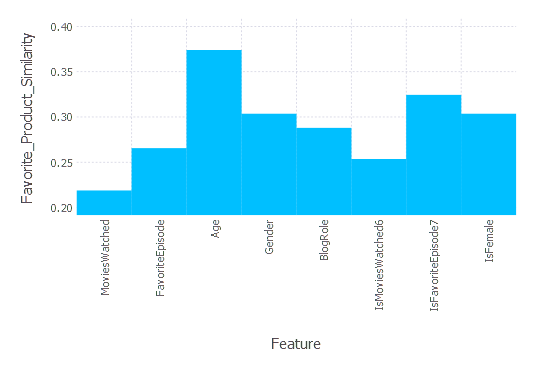

In [173]:
visual = plot(Z, x="Feature", y="Favorite_Product_Similarity", Geom.bar, Scale.y_continuous(minvalue=0.2, maxvalue=0.4))

In [174]:
draw(PNG("CftF final visual.png", 30cm, 15cm), visual)

So, in the future it would make sense to have a question like "Is episode VII your favorite episode?", along with the age and gender ones, while possibly adding some new questions.